In [1]:
import pandas as pd
import glob
from scipy.stats import spearmanr
from skbio import OrdinationResults, DistanceMatrix
import numpy as np
import qiime2 as q2
import re
from collections import Counter
from biom import (load_table,
                  Table)
from scipy.stats import spearmanr, ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
from collections import Counter
import matplotlib.patches as mpatches
from matplotlib.offsetbox import (DrawingArea, AnnotationBbox)
from pathlib import Path


# plotting
import colorsys
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from matplotlib.pyplot import cm
from matplotlib.colors import to_hex

#plt.style.use('ggplot')
plt.style.use('seaborn') 
%matplotlib inline

# set label font-sizes globally
paper_rc = {'lines.linewidth': 1, 
            'lines.markersize': 2}                  
sns.set_context("paper", rc = paper_rc)   
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12




In [2]:
from scipy import stats


splitcaps = lambda stmp : re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', stmp).replace('and', ' and').replace('of',' of')

# mmvec results
all_conditionals = {('-'.join(path.split('/')[-1].split('-')[:2]),
                     splitcaps(''.join(path.replace('-Institute','Institute').split('/')[-1])).split('-')[2]):q2.Artifact.load(path).view(pd.DataFrame)
                    for path in glob.glob('../results/mmvec-results-genus/*-conditionals.qza')}
all_biplots = {('-'.join(path.split('/')[-1].split('-')[:2]),
                splitcaps(''.join(path.replace('-Institute','Institute').split('/')[-1])).split('-')[2]):q2.Artifact.load(path).view(OrdinationResults)
               for path in glob.glob('../results/mmvec-results-genus/*-biplot.qza')}

Path("../results/figures").mkdir(parents=True, exist_ok=True)
Path("../results/tables").mkdir(parents=True, exist_ok=True)



#### to use based on Q-squared values:

* (fungi-bacteria, Harvard Medical School)
* (fungi-immune or immune-fungi, Harvard Medical School)

* (fungi-bacteria, Baylor College of Medicine)
* (fungi-immune or immune-fungi, Baylor College of Medicine)



# Co-occurance patterns

# Fungi - immune

In [3]:
immune_classes = {'Bcellsmemory':['memory B cells','B cell',
                                  'adaptive immunity'],
                 'Bcellsnaive':['naive B cells', 'B cell',
                                  'adaptive immunity'],
                 'Dendriticcellsactivated':['activated Dendritic cells',
                                            'Dendritic cells',
                                          'innate immunity'],
                 'Dendriticcellsresting':['resting Dendritic cells',
                                            'Dendritic cells',
                                          'innate immunity'],
                 'Eosinophils':['Eosinophils',
                                'Eosinophils',
                                'innate immunity'],
                 'MacrophagesM0':['non-activated (M0) Macrophages',
                                  'Macrophages',
                                  'innate immunity'],
                 'MacrophagesM1':['pro-inflammatory (M1) Macrophages',
                                  'Macrophages',
                                  'innate immunity'],
                 'MacrophagesM2':['anti-inflammatory (M2) Macrophages',
                                  'Macrophages',
                                  'innate immunity'],
                 'Mastcellsactivated':['activated Mast cells',
                                       'Mast cells',
                                       'innate immunity'],
                 'Mastcellsresting':['resting Mast cells',
                                       'Mast cells',
                                     'innate immunity'],
                 'Monocytes':['Monocytes',
                              'Monocytes',
                              'innate immunity'],
                 'NKcellsactivated':['activated NK cells',
                                     'NK cells','innate immunity'],
                 'NKcellsresting':['resting NK cells',
                                     'NK cells','innate immunity'],
                 'Neutrophils':['Neutrophils',
                                'Neutrophils',
                                'innate immunity'],
                 'Plasmacells':['Plasma cells',
                                'Plasma cells',
                                'adaptive immunity'],
                 'TcellsCD4memoryactivated':['activated Memory CD4+ T cells',
                                             'T cells',
                                'adaptive immunity'],
                 'TcellsCD4memoryresting':['resting Memory CD4+ T cells',
                                           'T cells',
                                'adaptive immunity'],
                 'TcellsCD4naive':['naive CD4+ T cells',
                                   'T cells',
                                'adaptive immunity'],
                 'TcellsCD8':['CD8+ T cells',
                              'T cells',
                                'adaptive immunity'],
                 'Tcellsfollicularhelper':['T follicular helper cells',
                                           'T cells',
                                           'adaptive immunity'],
                 'Tcellsgammadelta':['Gamma delta T cells',
                                     'T cells',
                                     'adaptive immunity'],
                 'TcellsregulatoryTregs':['Regulatory T cells',
                                          'T cells',
                                          'adaptive immunity']
                 }


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


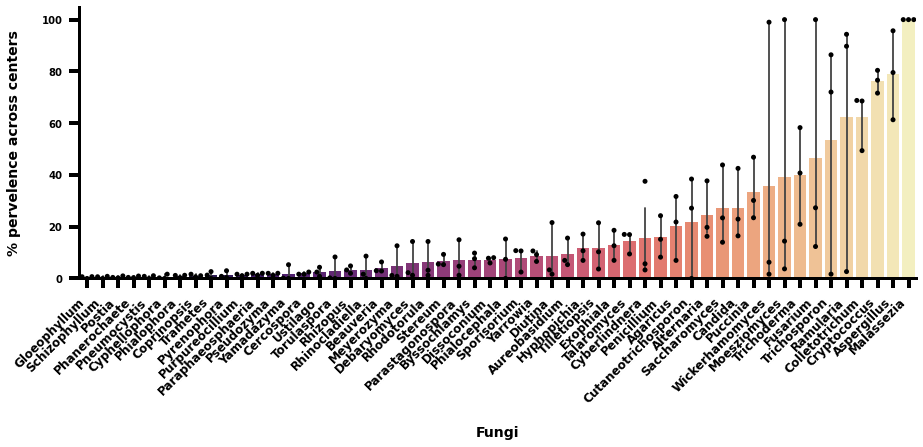

Harvard Medical School  Baylor College of Medicine  \
Rhinocladiella                        8.629                       0.000   
Coprinopsis                           1.064                       0.664   
Phialocephala                        15.248                       0.000   
Cutaneotrichosporon                  38.416                       0.000   
Gloeophyllum                          0.709                       0.664   
Paraphaeosphaeria                     2.009                       1.993   
Phanerochaete                         0.946                       0.332   
Pneumocystis                          1.064                       0.000   
Cyphellophora                         0.236                       1.661   
Schizophyllum                         0.827                       0.664   
Ramularia                            94.326                       2.658   
Phialophora                           1.182                       0.332   
Postia                                0.236                       0.997   
Tilletiopsis                         21.513                       3.654   
Trichosporon                         86.407                       1.661   
Purpureocillium                       1.064                       1.661   
Pseudozyma                            2.009                       1.993   
Trametes                              1.300                       2.658   
Yamadazyma                            0.118                       5.316   
Rhizopus                              4.846                       1.993   
Hyphopichia                          17.139                       6.977   
Pyrenophora                           0.355                       2.990   
Torulaspora                           0.236                       8.306   
Beauveria                             6.383                       2.990   
Ustilago                              2.482                       4.319   
Agaricus                             31.678                       6.977   
Cercospora                            2.482                       1.661   
Rhodotorula                           3.191                      14.286   
Sporisorium                          10.757                      10.631   
Dissoconium                           8.038                       5.980   
Debaryomyces                          2.246                      14.286   
Diutina                               3.310                      21.595   
Meyerozyma                            1.182                      12.625   
Yarrowia                              9.220                      10.631   
Byssochlamys                          9.811                       7.641   
Stereum                               5.556                       9.302   
Exophiala                            12.648                      18.605   
Aureobasidium                        15.603                       6.977   
Parastagonospora                      4.728                      14.950   
Talaromyces                          17.021                      16.944   
Penicillium                          15.130                      24.252   
Trichoderma                          58.274                      20.930   
Colletotrichum                       68.558                      68.771   
Alternaria                           37.707                      16.279   
Candida                              22.931                      42.525   
Cyberlindnera                         5.674                      37.542   
Puccinia                             30.142                      46.844   
Saccharomyces                        23.404                      43.854   
Cryptococcus                         76.596                      80.399   
Aspergillus                          79.551                      95.681   
Wickerhamomyces                       6.265                      99.003   
Moesziomyces                         14.421                     100.000   
Fusarium                             27.305   

<Figure size 432x288 with 0 Axes>

In [4]:
# import metadata with which to make subsets
allseq_mfdf = pd.read_csv('../data/genus_intersected_with_WIS/metadata_immune_WGS_AllSeqCenters_Primary_Tumor.txt',
                          sep='\t', index_col=0)

seq_centers = allseq_mfdf.data_submitting_center_label.value_counts()
seq_centers = seq_centers[seq_centers > 3]
allseq_mfdf = allseq_mfdf[allseq_mfdf.data_submitting_center_label.isin(seq_centers.index)]

fungi_bt = load_table('../data/genus_intersected_with_WIS/immune_rep200_counts_fungi_TCGA_AllSeqCenters_WGS_Primary_Tumor.biom')
fungi_bt_df = pd.DataFrame(fungi_bt.matrix_data.toarray(), fungi_bt.ids('observation'), fungi_bt.ids())
prevelence = pd.DataFrame({k:fungi_bt_df[df.index].astype(bool).sum(1) / df.shape[0] * 100
              for k, df in allseq_mfdf.groupby('data_submitting_center_label')}).sort_values('Washington University School of Medicine')
prevelence = prevelence.round(3)

locations = ['Harvard Medical School',
             'Baylor College of Medicine',
             'MD Anderson - Institute for Applied Cancer Science',
            ]
prevelence = prevelence[locations]

prevelence_stack = prevelence.stack().reset_index()
prevelence_stack.columns = ['genus', 'center', 'pervelence']

fig, ax = plt.subplots(1,1,figsize=(15, 5))

order_use = prevelence.mean(1).sort_values().index

sns.barplot(x='genus', y='pervelence', data=prevelence_stack, order=order_use, ax=ax, palette='magma')
sns.swarmplot(x='genus', y='pervelence', data=prevelence_stack, order=order_use, ax=ax, color='black')

ax.grid(False)

ax.set_facecolor('white')
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
for sp_i in ax.spines.values():
    sp_i.set_linewidth(3)
for child in ax.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_color('black')
ax.tick_params(axis='y', colors='black', width=4, length=10)
ax.tick_params(axis='x', colors='black', width=4, length=10)

for tick in ax.get_yticklabels():
    tick.set_fontproperties('arial')
    tick.set_weight("bold")
    tick.set_color("black")
    tick.set_fontsize(10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12,
                             color='black', weight='bold', ha='right')
ax.set_xlabel('\nFungi' ,color='black',weight='bold',fontsize=14)
ax.set_ylabel('% pervelence across centers\n' ,color='black',weight='bold',fontsize=14)

plt.show()

Path("../results/figures/fungal_immune_cooccurrence").mkdir(parents=True, exist_ok=True)
Path("../results/tables/fungal_immune_cooccurrence").mkdir(parents=True, exist_ok=True)

plt.savefig('../results/figures/fungal_immune_cooccurrence/genus-fungal-prevelence.pdf', 
            dpi=600, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
prevelence.to_csv('../results/tables/fungal_immune_cooccurrence/genus-fungal-prevelence.csv')
prevelence


/home/cmartino/.conda/envs/qiime2-2019.7/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cmartino/.conda/envs/qiime2-2019.7/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cmartino/.conda/envs/qiime2-2019.7/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


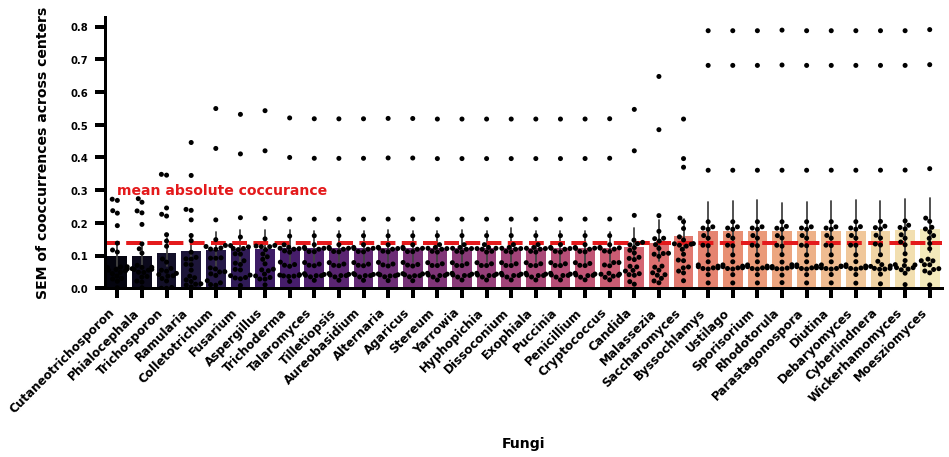

In [5]:
interaction_name = 'fungi-immune'

locations = ['Harvard Medical School',
             'Baylor College of Medicine',
             'MDAnderson Institutefor Applied Cancer Science',
            ]

cooccur_probs_immune_sems = pd.concat([pd.DataFrame(stats.zscore(all_conditionals[(interaction_name, loc)], axis=0),
                                               all_conditionals[(interaction_name, loc)].index,
                                               all_conditionals[(interaction_name, loc)].columns).T
                                  for loc in locations], sort=False).fillna(0)
cooccur_probs_immune_sems = cooccur_probs_immune_sems.abs().groupby(cooccur_probs_immune_sems.index).sem().dropna(axis=0)

cooccur_probs_immune_means = pd.concat([pd.DataFrame(stats.zscore(all_conditionals[(interaction_name, loc)], axis=0),
                                               all_conditionals[(interaction_name, loc)].index,
                                               all_conditionals[(interaction_name, loc)].columns).T
                                  for loc in locations], sort=False).fillna(0)
cooccur_probs_immune_means = cooccur_probs_immune_sems.abs().groupby(cooccur_probs_immune_sems.index).mean().dropna(axis=0)
mean_mean = cooccur_probs_immune_means.mean(1).mean()

cooccur_probs_immune_sems_stack = cooccur_probs_immune_sems.stack().reset_index()
cooccur_probs_immune_sems_stack.columns = ['species', 'immune-cell', 'SEM']


fig, ax = plt.subplots(1,1,figsize=(15, 5))

order_use = cooccur_probs_immune_sems.mean(1).sort_values().index

sns.barplot(x='species', y='SEM', data=cooccur_probs_immune_sems_stack, order=order_use, ax=ax, palette='magma')
sns.swarmplot(x='species', y='SEM', data=cooccur_probs_immune_sems_stack, order=order_use, ax=ax, color='black')

ax.grid(False)

ax.set_facecolor('white')
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
for sp_i in ax.spines.values():
    sp_i.set_linewidth(3)
for child in ax.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_color('black')
ax.tick_params(axis='y', colors='black', width=4, length=10)
ax.tick_params(axis='x', colors='black', width=4, length=10)

for tick in ax.get_yticklabels():
    tick.set_fontproperties('arial')
    tick.set_weight("bold")
    tick.set_color("black")
    tick.set_fontsize(10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12,
                             color='black', weight='bold', ha='right')
ax.set_xlabel('\nFungi' ,color='black',weight='bold',fontsize=14)
ax.set_ylabel('SEM of cooccurrences across centers\n' ,color='black',weight='bold',fontsize=14)

ax.axhline(mean_mean, c='#e41a1c', ls='--', lw=4)
ax.text(-0.01, mean_mean + .15, 'mean absolute coccurance', fontsize=14, color='#e41a1c', weight='bold')

plt.savefig('../results/figures/fungal_immune_cooccurrence/genus-fungal-cooccur-mean-vs-sem.pdf', 
            dpi=600, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
plt.savefig('../results/figures/fungal_immune_cooccurrence/genus-fungal-cooccur-mean-vs-sem.svg', 
            dpi=600, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()



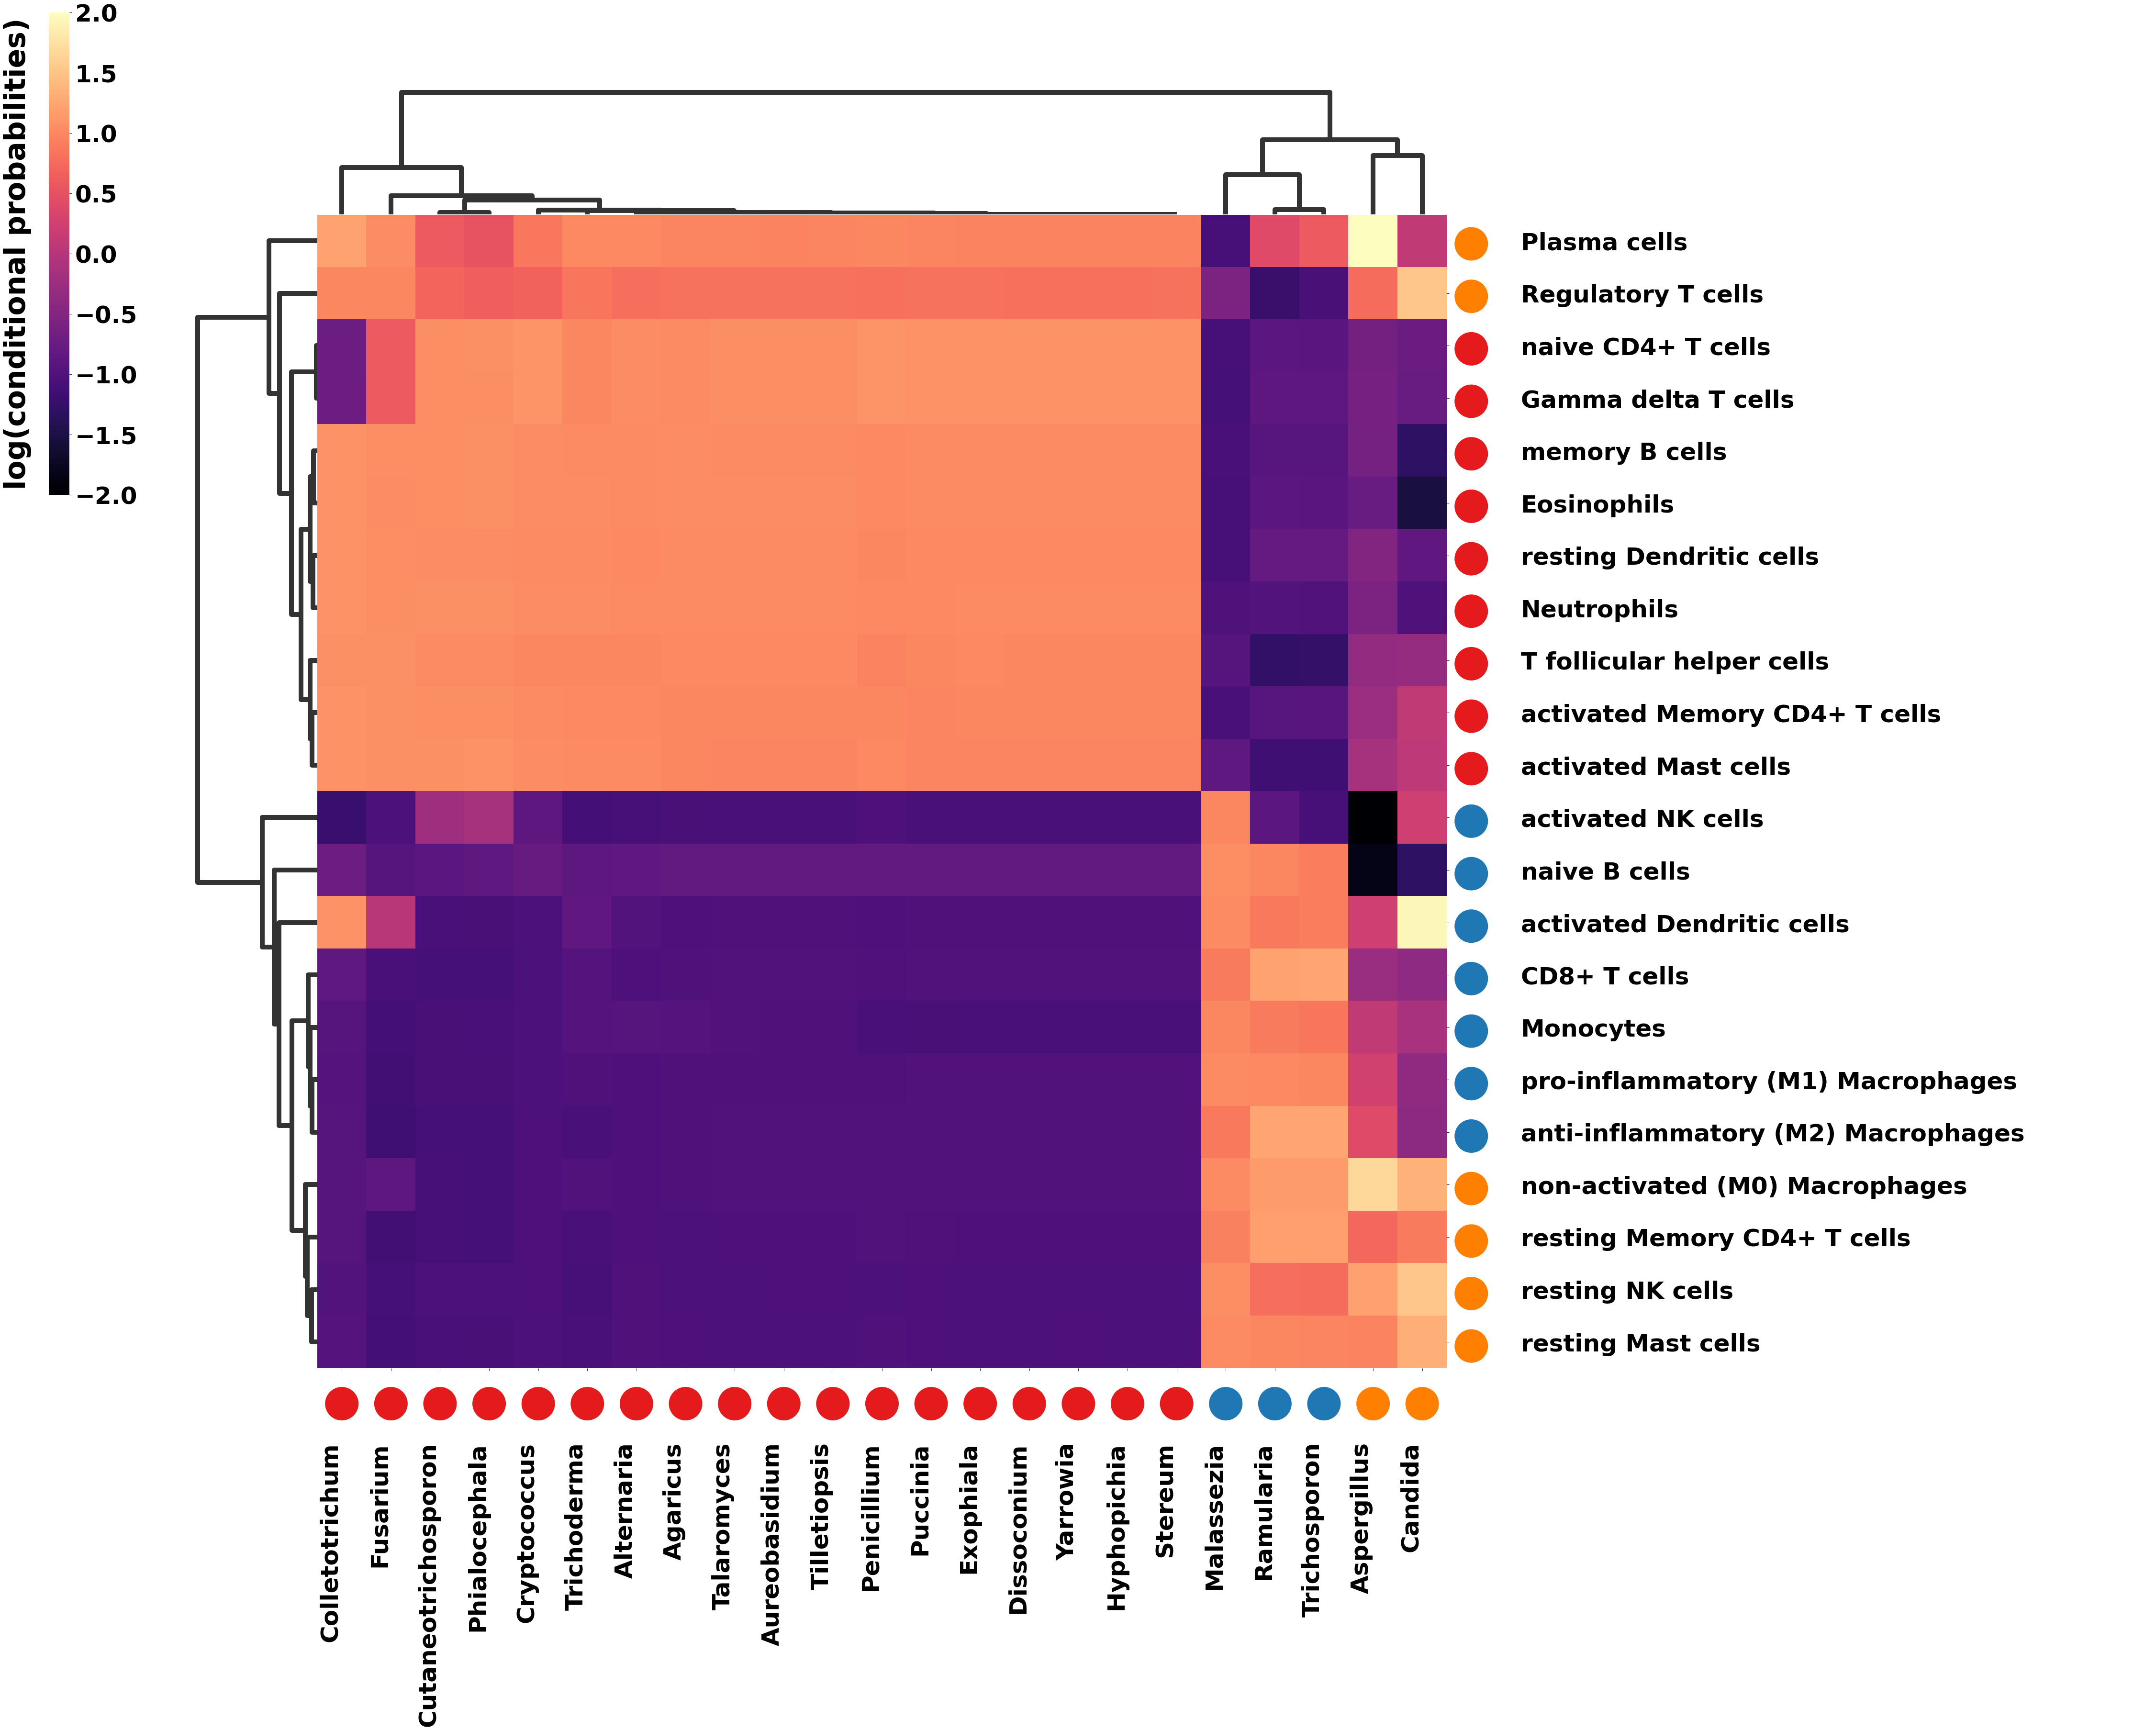

In [6]:
interaction_name = 'fungi-immune'

locations = ['Harvard Medical School',
             'Baylor College of Medicine',
             'MDAnderson Institutefor Applied Cancer Science',
            ]

cooccur_probs_immune_sem_mean = cooccur_probs_immune_sems.abs().mean(1) 
use_sp_low_sem = cooccur_probs_immune_sem_mean[cooccur_probs_immune_sem_mean < mean_mean].index

cooccur_probs_immune = pd.concat([pd.DataFrame(stats.zscore(all_conditionals[(interaction_name, loc)], axis=1),
                                               all_conditionals[(interaction_name, loc)].index,
                                               all_conditionals[(interaction_name, loc)].columns).T
                                  for loc in locations], sort=False)
cooccur_probs_immune  = cooccur_probs_immune.loc[list(use_sp_low_sem) + ['Malassezia'], :]

cooccur_probs_immune = cooccur_probs_immune.groupby(cooccur_probs_immune.index).median()
cooccur_probs_immune.columns = [immune_classes[x][0] for x in cooccur_probs_immune.columns]

# subset
cooccur_probs_immune = cooccur_probs_immune.dropna(axis=1)
cooccur_probs_immune = pd.DataFrame(stats.zscore(cooccur_probs_immune, axis=1),
                                    cooccur_probs_immune.index,
                                    cooccur_probs_immune.columns)

from matplotlib.pyplot import cm

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12

g = sns.clustermap(cooccur_probs_immune.T,
                   vmax = 2.0,
                   vmin = -2.0,
                   row_cluster=True,
                   col_cluster=True,
                   linewidths=0.0,
                   linecolor='black',
                   yticklabels=True,
                   xticklabels=True,
                   dendrogram_ratio = (.1, .1),
                   colors_ratio = (.01, .01),
                   figsize=(40, 40),
                   cmap="magma",
                   z_score=None)

# Adjust the postion of the main colorbar for the heatmap
g.cax.set_position([-0.1, 0.7, .015, .35])
g.cax.set_ylabel('log(conditional probabilities)', rotation=90, labelpad=-280,
                 fontsize=60, weight='bold', color='black')
for tick in g.cax.get_yticklabels():
    tick.set_weight('bold')
    tick.set_color("black")
    tick.set_fontsize(50)

g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=50, 
                             color='black', weight='bold', ha='left')
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=50,
                             color='black', weight='bold', ha='right')
g.ax_heatmap.tick_params(axis='both', which='major', pad=150)

g.ax_heatmap.set_xlabel('\n\n' ,color='black',weight='bold',fontsize=60)
g.ax_heatmap.set_ylabel('\n\n\n ' ,color='black',weight='bold',fontsize=60)

for a in g.ax_row_dendrogram.collections:
    a.set_linewidth(10)
for a in g.ax_col_dendrogram.collections:
    a.set_linewidth(10)

order_fungi_plot = [cooccur_probs_immune.index[i] for i in g.dendrogram_col.reordered_ind]
# label rows 
cooccur_probs_immune_make_clusters = cooccur_probs_immune.copy().stack().reset_index()
list_other = set(cooccur_probs_immune.index) - set(['Aspergillus','Candida',
                                                    'Saccharomyces','Malassezia',
                                                    'Ramularia','Trichosporon'])
fungal_genus_groupings = {'F1':['Saccharomyces','Malassezia','Ramularia','Trichosporon'],
                          'F2':['Candida', 'Aspergillus'],
                          'F3':list_other}
label_coclusters = {v_i:k for k, v in fungal_genus_groupings.items() for v_i in v}
cooccur_probs_immune_make_clusters['immune_labels'] = [label_coclusters[x]
                                                       if x in label_coclusters.keys()
                                                       else 'F3'
                                                       for x in cooccur_probs_immune_make_clusters['level_0']]
immune_cell_cooccrrance_clusters = {immune_cell:immune_cell_df.groupby('immune_labels').median().sort_values(0).index[-1]
 for immune_cell, immune_cell_df in cooccur_probs_immune_make_clusters.groupby('level_1')}
immune_cell_cooccrrance_clusters['resting Memory CD4+ T cells'] = 'F2'
immune_cell_cooccrrance_clusters['activated NK cells'] = 'F1'
immune_cell_cooccrrance_clusters['activated Dendritic cells'] = 'F1'

pal_tmp_cooccrrance_clusters = {'F1':'#1f78b4', 'F2':'#ff7f00', 'F3':'#e41a1c'}

order_immune_plot = [cooccur_probs_immune.columns[i] for i in g.dendrogram_row.reordered_ind]
# Annotate the 1st position with a circle patch
x_i = 0.025
for _, key_t in enumerate(order_immune_plot[::-1]):
    color_ = pal_tmp_cooccrrance_clusters[immune_cell_cooccrrance_clusters[key_t]]
    da = DrawingArea(20, 20, 10, 10)
    p = mpatches.Circle((0, 0), 35, facecolor=color_)
    da.add_artist(p)
    ab = AnnotationBbox(da, (len(cooccur_probs_immune.index) + 0.5, x_i),
                        xybox=(0, -4),
                        xycoords=("data", "axes fraction"),
                        box_alignment=(.5, 1),
                        boxcoords="offset points",
                        bboxprops={"edgecolor" : "none"})
    ab.set_zorder(-1)
    g.ax_heatmap.add_artist(ab)
    x_i += 0.0455
    
    

pal_tmp_fungi_color = {k:pal_tmp_cooccrrance_clusters[v] for k, v in label_coclusters.items()}
order_fungi_plot = [cooccur_probs_immune.index[i] for i in g.dendrogram_col.reordered_ind]
x_i = 0.5
for _, key_t in enumerate(order_fungi_plot):
    if key_t in pal_tmp_fungi_color.keys():
        color_ = pal_tmp_fungi_color[key_t]
    else:
        color_ = pal_tmp_cooccrrance_clusters['F3']
    da = DrawingArea(20, 20, 10, 10)
    p = mpatches.Circle((0, 0), 35, facecolor=color_)
    da.add_artist(p)
    ab = AnnotationBbox(da, (x_i, -0.025),
                        xybox=(0, -4),
                        xycoords=("data", "axes fraction"),
                        box_alignment=(.5, 1),
                        boxcoords="offset points",
                        bboxprops={"edgecolor" : "none"})
    ab.set_zorder(-1)
    g.ax_heatmap.add_artist(ab)
    x_i += 1

    
Path("../results/tables/fungal_immune_cooccurrence").mkdir(parents=True, exist_ok=True)

plt.savefig('../results/figures/fungal_immune_cooccurrence/genus-fungal-mean-cooccur-heatmap.pdf', 
            dpi=300, 
            bbox_inches='tight',
            edgecolor='none')
plt.savefig('../results/figures/fungal_immune_cooccurrence/genus-fungal-mean-cooccur-heatmap.svg', 
            dpi=300, 
            bbox_inches='tight',
            edgecolor='none')

cooccur_probs_immune_save = cooccur_probs_immune.loc[[cooccur_probs_immune.index[i] for i in g.dendrogram_col.reordered_ind],
                                                     [cooccur_probs_immune.columns[i] for i in g.dendrogram_row.reordered_ind]].T
cooccur_probs_immune_save.to_csv('../results/tables/fungal_immune_cooccurrence/mmvec-cooccurrence-table.csv')


plt.show()



In [7]:
cooccur_probs_immune_save.head(5)

Colletotrichum  Fusarium  Cutaneotrichosporon  \
Plasma cells               1.225786  1.042792             0.601361   
Regulatory T cells         0.987352  0.984989             0.698932   
naive CD4+ T cells        -0.730607  0.601231             1.053471   
Gamma delta T cells       -0.703329  0.602295             1.053008   
memory B cells             1.088281  1.053022             1.057719   

                     Phialocephala  Cryptococcus  Trichoderma  Alternaria  \
Plasma cells              0.530762      0.873580     1.014471    1.006672   
Regulatory T cells        0.642245      0.685606     0.853847    0.794811   
naive CD4+ T cells        1.063322      1.101160     0.986162    1.044120   
Gamma delta T cells       1.062071      1.100650     0.985954    1.043775   
memory B cells            1.066928      1.032592     1.025949    1.018122   

                     Agaricus  Talaromyces  Aureobasidium  ...  Exophiala  \
Plasma cells         0.976723     0.971213       0.968568  ...   0.961890   
Regulatory T cells   0.822008     0.814628       0.818820  ...   0.812831   
naive CD4+ T cells   1.026958     1.051151       1.052973  ...   1.079847   
Gamma delta T cells  1.026327     1.050227       1.052184  ...   1.078576   
memory B cells       1.035278     1.030157       1.029233  ...   1.023125   

                     Dissoconium  Yarrowia  Hyphopichia   Stereum  Malassezia  \
Plasma cells            0.964333  0.964881     0.963184  0.963576   -1.089730   
Regulatory T cells      0.812066  0.812327     0.811925  0.812700   -0.559077   
naive CD4+ T cells      1.080672  1.079936     1.080265  1.080128   -1.089948   
Gamma delta T cells     1.079381  1.078696     1.079096  1.078942   -1.100008   
memory B cells          1.022089  1.022096     1.022591  1.022369   -1.052328   

                     Ramularia  Trichosporon  Aspergillus   Candida  
Plasma cells          0.411151      0.599731     2.264211  0.102214  
Regulatory T cells   -1.224505     -1.063164     0.781080  1.518371  
naive CD4+ T cells   -0.883272     -0.893011    -0.651853 -0.740949  
Gamma delta T cells  -0.865473     -0.872820    -0.618615 -0.752602  
memory B cells       -0.925695     -0.934270    -0.630540 -1.298532  

[5 rows x 23 columns]

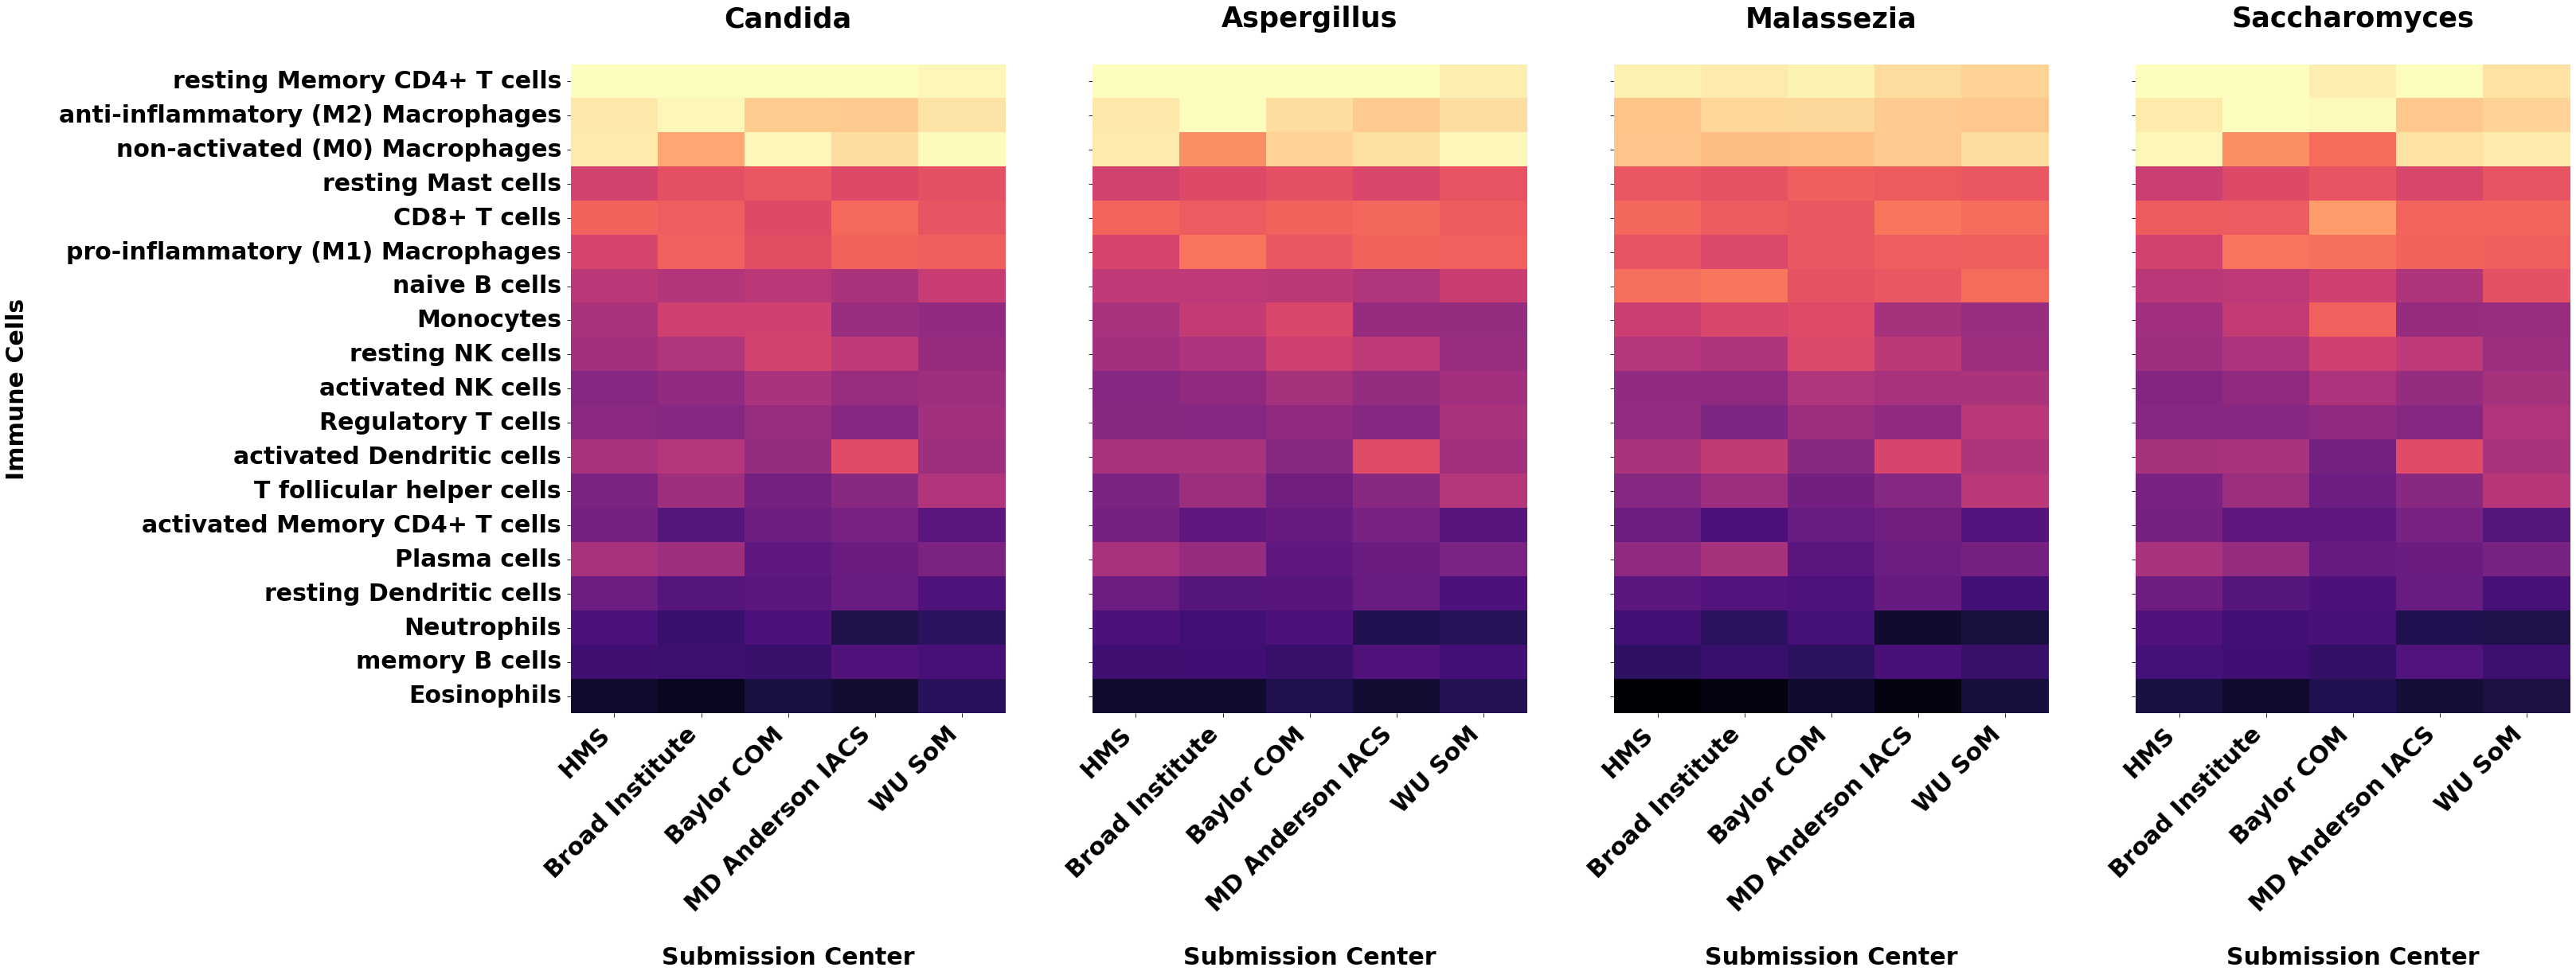

In [8]:
"""
get order
"""

interaction_name = 'fungi-immune'
locations = ['Harvard Medical School',
             'Broad Institute of MIT and Harvard',
             'Baylor College of Medicine',
             'MDAnderson Institutefor Applied Cancer Science',
             'Washington University School of Medicine']

cooccur_probs_immune = all_conditionals[(interaction_name, 'Baylor College of Medicine')].copy().T
cooccur_probs_immune = pd.DataFrame(stats.zscore(cooccur_probs_immune, axis=1),
                                    cooccur_probs_immune.index, cooccur_probs_immune.columns)
cooccur_probs_immune.columns = [immune_classes[x][0] for x in cooccur_probs_immune.columns]
use_order = cooccur_probs_immune.T['Malassezia'].sort_values(ascending=False).index

from matplotlib.pyplot import cm

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12

fig, axn = plt.subplots(1, 4, figsize=(45, 15), sharex=True, sharey=True)

use_sp_plot =  ['Candida',
                'Aspergillus',
                 'Malassezia',
                 'Saccharomyces']

for ax, use_sp_plot_col in zip(axn, use_sp_plot):

    all_centers = []

    for center_name_tmp in locations:

        cooccur_probs_immune = all_conditionals[(interaction_name, center_name_tmp)].copy().T
        cooccur_probs_immune = pd.DataFrame(stats.zscore(cooccur_probs_immune, axis=1),
                                            cooccur_probs_immune.index, cooccur_probs_immune.columns)
        cooccur_probs_immune.columns = [immune_classes[x][0] for x in cooccur_probs_immune.columns]

        # subset
        cooccur_probs_immune = cooccur_probs_immune.loc[[use_sp_plot_col], :]
        cooccur_probs_immune.index = [center_name_tmp]
        all_centers.append(cooccur_probs_immune)

    cooccur_probs_immune_all = pd.concat(all_centers, sort=False)
    cooccur_probs_immune_all = cooccur_probs_immune_all[use_order]
    cooccur_probs_immune_all = cooccur_probs_immune_all.dropna(axis=1)
    cooccur_probs_immune_all = cooccur_probs_immune_all.T
    column_relabel = {'Harvard Medical School':'HMS', 'Broad Institute of MIT and Harvard':'Broad Institute',
                       'Baylor College of Medicine':'Baylor COM',
                       'MDAnderson Institutefor Applied Cancer Science':'MD Anderson IACS',
                       'Washington University School of Medicine':'WU SoM'}
    cooccur_probs_immune_all = cooccur_probs_immune_all.rename(column_relabel, axis=1)
    cooccur_probs_immune_all = pd.DataFrame(stats.zscore(cooccur_probs_immune_all, axis=0),
                                            cooccur_probs_immune_all.index, cooccur_probs_immune_all.columns)
    g = sns.heatmap(cooccur_probs_immune_all,
                       vmax = 2.0,
                       vmin = -2.0,
                       yticklabels=True,
                       xticklabels=True,
                       cmap="magma",
                        cbar=False,
                       ax=ax)
    ax.set_xlabel('\nSubmission Center' ,color='black',weight='bold',fontsize=30)
    ax.set_title(use_sp_plot_col.replace(' (', '\n(') ,color='black',weight='bold', y=1.05,fontsize=35)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=30,
                       color='black', weight='bold', ha='right')

axn[0].set_yticklabels(axn[0].get_yticklabels(), fontsize=30,
                       color='black', weight='bold', )
axn[0].set_ylabel('Immune Cells\n' ,color='black',weight='bold',fontsize=30)


Path("../results/tables/fungal_immune_cooccurrence").mkdir(parents=True, exist_ok=True)

plt.savefig('../results/figures/fungal_immune_cooccurrence/genus-fungal-per-center-cooccur-heatmap.pdf', 
            dpi=300, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
plt.savefig('../results/figures/fungal_immune_cooccurrence/genus-fungal-per-center-cooccur-heatmap.svg', 
            dpi=300, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()


# fungi-to-bacteria

/home/cmartino/.conda/envs/qiime2-2019.7/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cmartino/.conda/envs/qiime2-2019.7/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


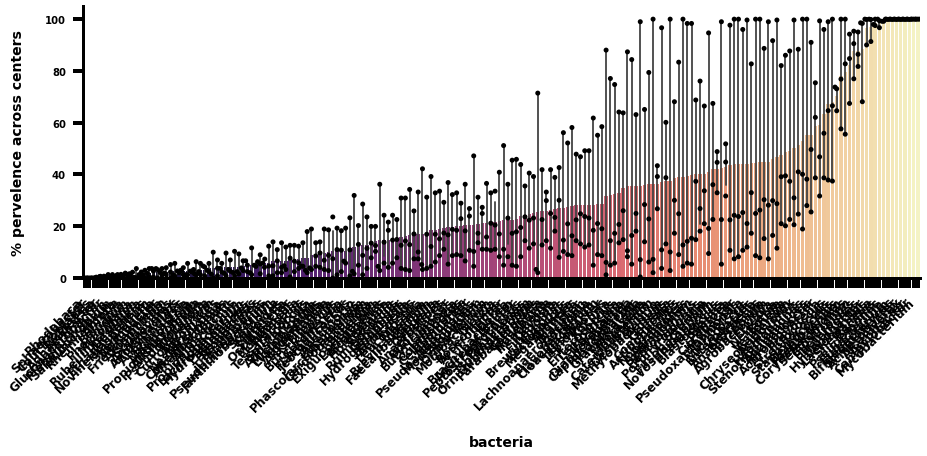

Harvard Medical School  Baylor College of Medicine  \
Rhodobaca                            0.000                       0.000   
Salinimicrobium                      0.709                       0.997   
Couchioplanes                        0.118                       0.000   
Sphaerobacter                        0.000                       0.000   
Phormidium                           2.246                       0.000   
Noviherbaspirillum                   3.664                       2.658   
Gluconacetobacter                    0.473                       1.329   
Schwartzia                           2.364                       2.658   
Adhaeribacter                        0.709                       0.664   
Ethanoligenens                       1.773                       3.654   
Mycoplana                            0.236                       3.654   
Anaerovorax                          2.719                       2.990   
Rickettsia                           0.591                       0.332   
Planomicrobium                       0.473                       1.329   
Lachnobacterium                      4.965                       6.645   
Afifella                             1.891                       0.332   
Oscillibacter                        6.501                      12.625   
Paludibacter                         4.492                       6.312   
Bilophila                           10.993                      19.269   
Eggerthella                          8.747                      18.605   
Turicibacter                         2.128                       3.654   
Microbispora                         9.693                      13.953   
Rheinheimera                         1.418                       1.329   
Desemzia                             1.182                       2.990   
Agromyces                            5.674                       2.326   
Rubellimicrobium                     1.300                       2.326   
Butyricicoccus                      10.757                      18.272   
Belnapia                             1.537                       1.661   
Acetivibrio                         13.002                      20.266   
Flavonifractor                      10.875                      23.256   
...                                    ...                         ...   
Aeromonas                           15.366                      98.339   
Actinobacillus                      12.766                     100.000   
Proteus                             10.047                     100.000   
Erwinia                             28.723                      99.668   
Pseudoxanthomonas                   25.296                      96.013   
Chryseobacterium                    30.969                      99.668   
Morganella                           7.210                     100.000   
Blautia                             22.459                      97.674   
Clostridium                         90.544                      95.349   
Pantoea                             24.232                     100.000   
Shewanella                          97.518                     100.000   
Haemophilus                         40.071                     100.000   
Corynebacterium                     82.742                     100.000   
Bacillus                            99.409                     100.000   
Klebsiella                          26.241                     100.000   
Prevotella                          55.910                      96.013   
Eubacterium                         99.882                     100.000   
Arcobacter                          99.882                     100.000   
Campylobacter                      100.000                     100.000   
Streptomyces                        99.882                     100.000   
Pseudomonas                         99.173                     100.000   
Acinetobacter                       99.882                     100.000   
Enterobacter            

<Figure size 432x288 with 0 Axes>

In [9]:
# import metadata with which to make subsets
allseq_mfdf = pd.read_csv('../data/genus_intersected_with_WIS/metadata_immune_WGS_AllSeqCenters_Primary_Tumor.txt',
                          sep='\t', index_col=0)

seq_centers = allseq_mfdf.data_submitting_center_label.value_counts()
seq_centers = seq_centers[seq_centers > 3]
allseq_mfdf = allseq_mfdf[allseq_mfdf.data_submitting_center_label.isin(seq_centers.index)]

bacteria_bt = load_table('../data/genus_intersected_with_WIS/immune_rep200_counts_bacteria_TCGA_AllSeqCenters_WGS_Primary_Tumor.biom')
bacteria_bt_df = pd.DataFrame(bacteria_bt.matrix_data.toarray(), bacteria_bt.ids('observation'), bacteria_bt.ids())
prevelence = pd.DataFrame({k:bacteria_bt_df[df.index].astype(bool).sum(1) / df.shape[0] * 100
              for k, df in allseq_mfdf.groupby('data_submitting_center_label')}).sort_values('Washington University School of Medicine')
prevelence = prevelence.round(3)


locations = ['Harvard Medical School',
             'Baylor College of Medicine',
             'MD Anderson - Institute for Applied Cancer Science',
            ]
prevelence = prevelence[locations]

prevelence_stack = prevelence.stack().reset_index()
prevelence_stack.columns = ['genus', 'center', 'pervelence']

fig, ax = plt.subplots(1,1,figsize=(15, 5))

order_use = prevelence.mean(1).sort_values().index

sns.barplot(x='genus', y='pervelence', data=prevelence_stack, order=order_use, ax=ax, palette='magma')
sns.swarmplot(x='genus', y='pervelence', data=prevelence_stack, order=order_use, ax=ax, color='black')

ax.grid(False)

ax.set_facecolor('white')
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
for sp_i in ax.spines.values():
    sp_i.set_linewidth(3)
for child in ax.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_color('black')
ax.tick_params(axis='y', colors='black', width=4, length=10)
ax.tick_params(axis='x', colors='black', width=4, length=10)

for tick in ax.get_yticklabels():
    tick.set_fontproperties('arial')
    tick.set_weight("bold")
    tick.set_color("black")
    tick.set_fontsize(10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12,
                             color='black', weight='bold', ha='right')
ax.set_xlabel('\nbacteria' ,color='black',weight='bold',fontsize=14)
ax.set_ylabel('% pervelence across centers\n' ,color='black',weight='bold',fontsize=14)

plt.show()

Path("../results/figures/fungal_bacteria_cooccurrence").mkdir(parents=True, exist_ok=True)
Path("../results/tables/fungal_bacteria_cooccurrence").mkdir(parents=True, exist_ok=True)


plt.savefig('../results/figures/fungal_bacteria_cooccurrence/genus-bacteria-prevelence.pdf', 
            dpi=600, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
plt.savefig('../results/figures/fungal_bacteria_cooccurrence/genus-bacteria-prevelence.svg', 
            dpi=600, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
prevelence.to_csv('../results/tables/fungal_bacteria_cooccurrence/genus-bacteria-prevelence.csv')
prevelence

/home/cmartino/.conda/envs/qiime2-2019.7/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cmartino/.conda/envs/qiime2-2019.7/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cmartino/.conda/envs/qiime2-2019.7/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cmartino/.conda/envs/qiime2-2019.7/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/

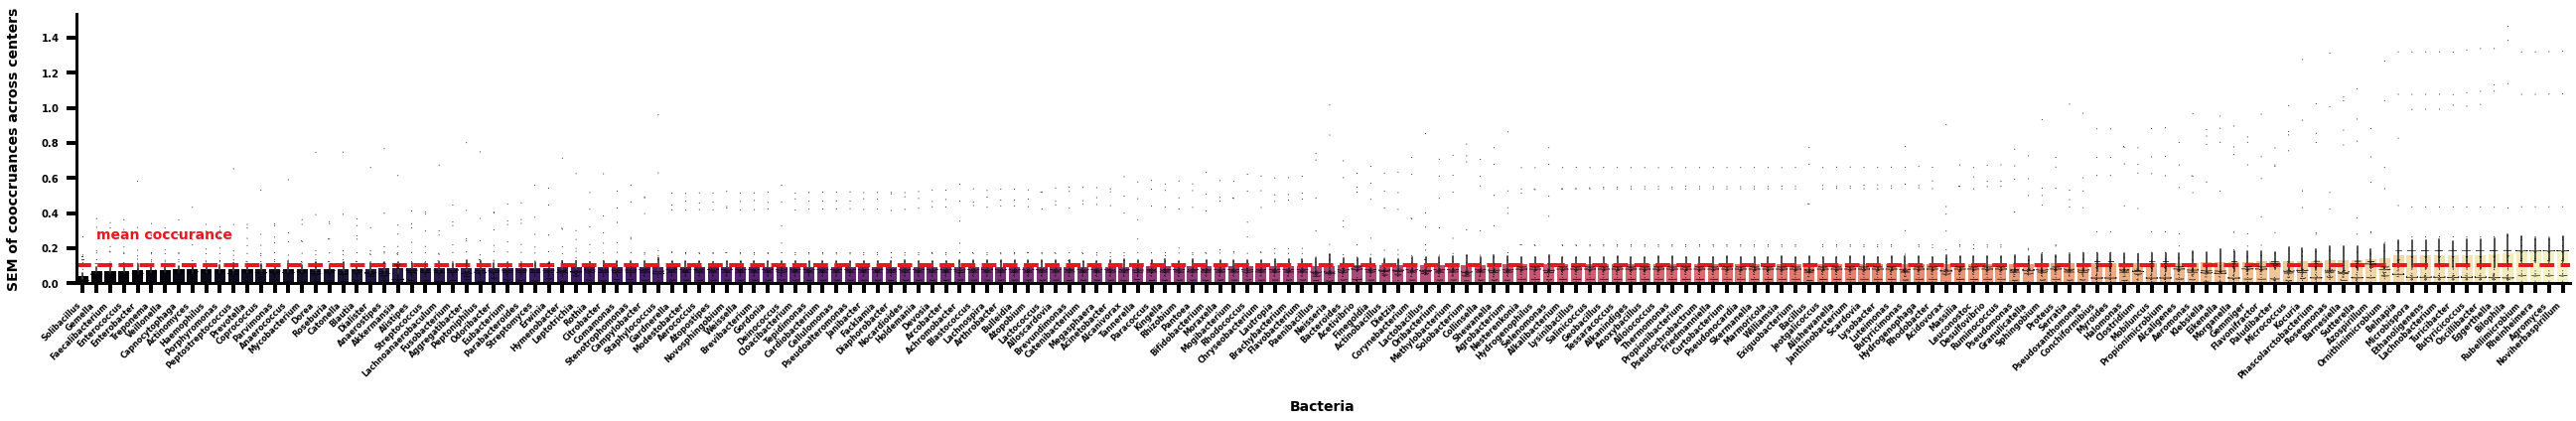

In [10]:
interaction_name = 'fungi-bacteria'

locations = ['Harvard Medical School',
             'Broad Institute of MIT and Harvard',
             'Baylor College of Medicine',
             'MDAnderson Institutefor Applied Cancer Science',
             'Washington University School of Medicine']

cooccur_probs_bacteria_sems = pd.concat([pd.DataFrame(stats.zscore(all_conditionals[(interaction_name, loc)], axis=1),
                                               all_conditionals[(interaction_name, loc)].index,
                                               all_conditionals[(interaction_name, loc)].columns)
                                  for loc in locations], sort=False).fillna(0)
cooccur_probs_bacteria_sems = cooccur_probs_bacteria_sems.abs().groupby(cooccur_probs_bacteria_sems.index).sem().dropna(axis=0)

cooccur_probs_bacteria_means = pd.concat([pd.DataFrame(stats.zscore(all_conditionals[(interaction_name, loc)], axis=1),
                                               all_conditionals[(interaction_name, loc)].index,
                                               all_conditionals[(interaction_name, loc)].columns)
                                  for loc in locations], sort=False).fillna(0)
cooccur_probs_bacteria_means = cooccur_probs_bacteria_sems.abs().groupby(cooccur_probs_bacteria_sems.index).mean().dropna(axis=0)
mean_mean = cooccur_probs_bacteria_means.abs().mean(1).mean()

cooccur_probs_bacteria_sems_stack = cooccur_probs_bacteria_sems.stack().reset_index()
cooccur_probs_bacteria_sems_stack.columns = ['genus', 'bacteria-cell', 'SEM']


fig, ax = plt.subplots(1,1,figsize=(45, 5))

order_use = cooccur_probs_bacteria_sems.mean(1).sort_values().index

sns.barplot(x='genus', y='SEM', data=cooccur_probs_bacteria_sems_stack, order=order_use, ax=ax, palette='magma')
sns.swarmplot(x='genus', y='SEM', s=1, data=cooccur_probs_bacteria_sems_stack, order=order_use, ax=ax, color='black')

ax.grid(False)

ax.set_facecolor('white')
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
for sp_i in ax.spines.values():
    sp_i.set_linewidth(3)
for child in ax.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_color('black')
ax.tick_params(axis='y', colors='black', width=4, length=10)
ax.tick_params(axis='x', colors='black', width=4, length=10)

for tick in ax.get_yticklabels():
    tick.set_fontproperties('arial')
    tick.set_weight("bold")
    tick.set_color("black")
    tick.set_fontsize(10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8,
                             color='black', weight='bold', ha='right')
ax.set_xlabel('\nBacteria' ,color='black',weight='bold',fontsize=14)
ax.set_ylabel('SEM of cooccruances across centers\n' ,color='black',weight='bold',fontsize=14)

ax.axhline(mean_mean, c='#e41a1c', ls='--', lw=4)
ax.text(1, mean_mean + .15, 'mean coccurance', fontsize=14, color='#e41a1c', weight='bold')

plt.savefig('../results/figures/fungal_bacteria_cooccurrence/bacterial-cooccur-mean-vs-sem.pdf', 
            dpi=300, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
plt.savefig('../results/figures/fungal_bacteria_cooccurrence/bacterial-cooccur-mean-vs-sem.svg', 
            dpi=300, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')


plt.show()

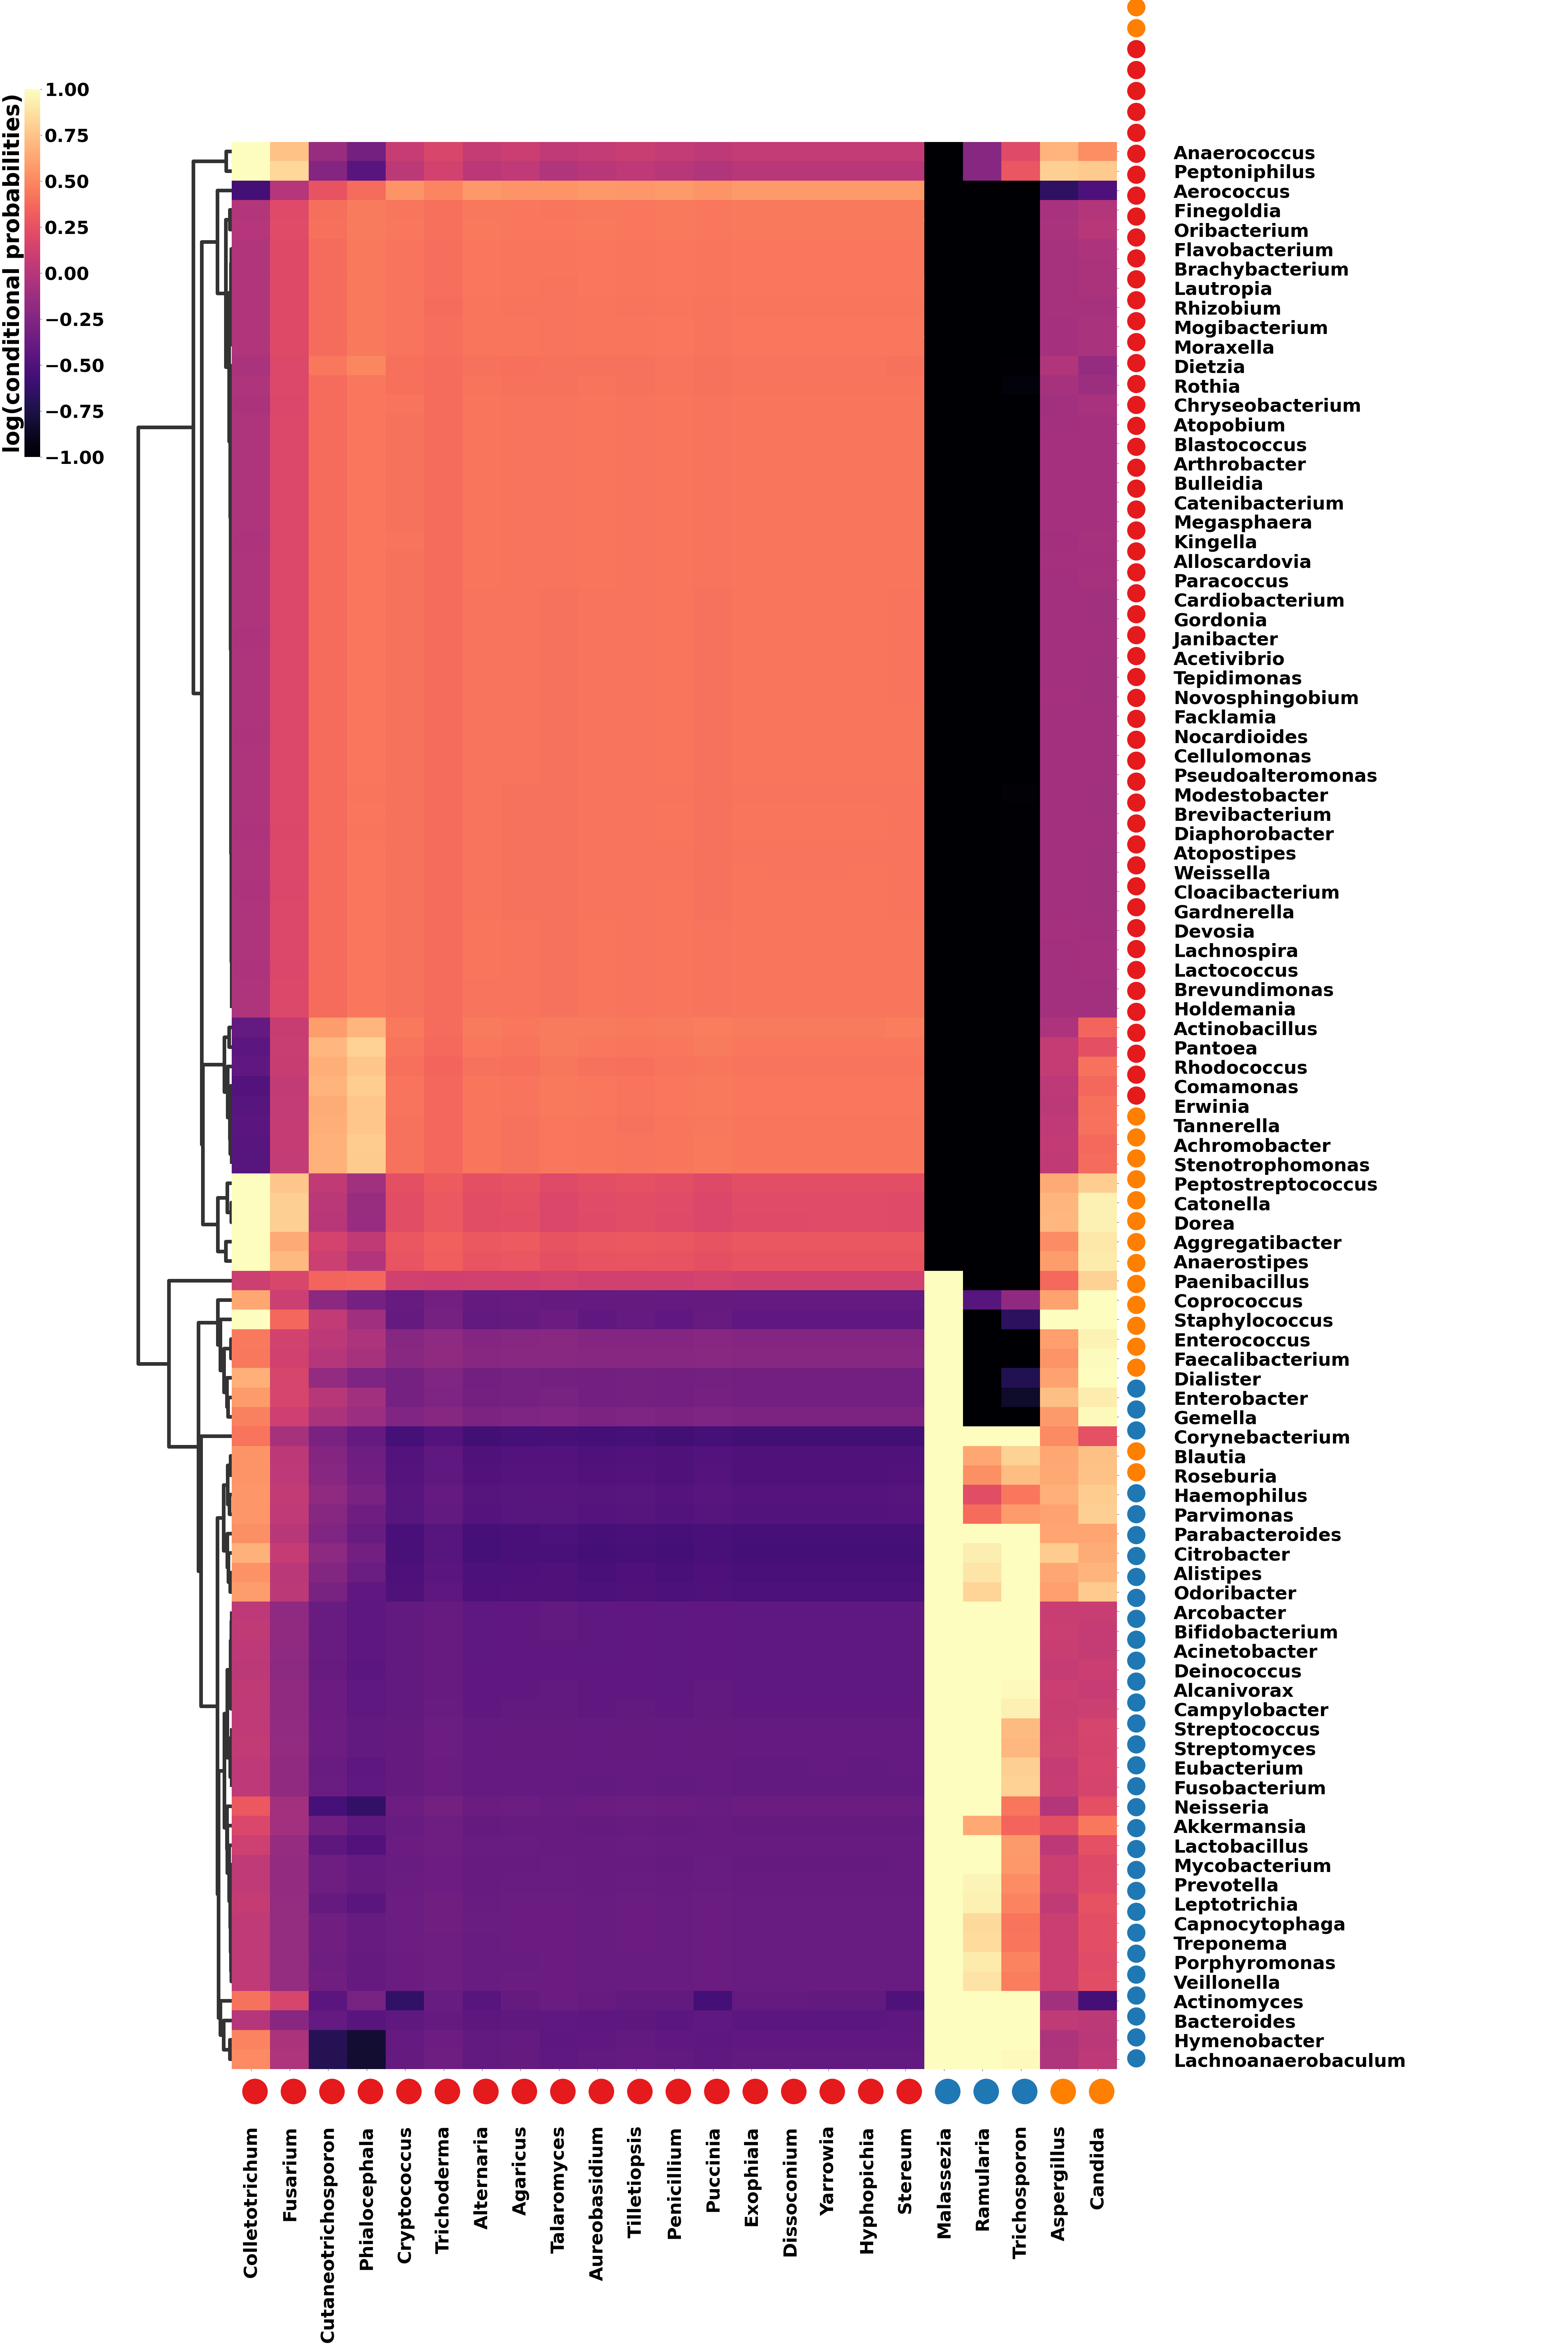

In [11]:
interaction_name = 'fungi-bacteria'
locations = ['Harvard Medical School',
             'Baylor College of Medicine',
             'MDAnderson Institutefor Applied Cancer Science',
            ]

cooccur_probs_bacteria_sem_mean = cooccur_probs_bacteria_sems.abs().mean(1) 
use_sp_low_sem = cooccur_probs_bacteria_sem_mean[cooccur_probs_bacteria_sem_mean < mean_mean].index
fungi_sp_cooccur = use_sp_low_sem

cooccur_probs_bacteria = pd.concat([pd.DataFrame(stats.zscore(all_conditionals[(interaction_name, loc)], axis=1),
                                               all_conditionals[(interaction_name, loc)].index,
                                               all_conditionals[(interaction_name, loc)].columns)
                                  for loc in locations], sort=False)
cooccur_probs_bacteria  = cooccur_probs_bacteria.loc[use_sp_low_sem, :]
cooccur_probs_bacteria = cooccur_probs_bacteria.groupby(cooccur_probs_bacteria.index).mean()

# subset
cooccur_probs_bacteria = cooccur_probs_bacteria.dropna(axis=0)


order_fungi_plot_subset = [v for v in order_fungi_plot if v in  label_coclusters.keys()]

cooccur_probs_bacteria = pd.DataFrame(stats.zscore(cooccur_probs_bacteria, axis=1),
                                    cooccur_probs_bacteria.index,
                                    cooccur_probs_bacteria.columns)[order_fungi_plot_subset]

cooccur_probs_bacteria = pd.DataFrame(stats.zscore(cooccur_probs_bacteria, axis=1),
                                    cooccur_probs_bacteria.index,
                                    cooccur_probs_bacteria.columns)

from matplotlib.pyplot import cm

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12

g = sns.clustermap(cooccur_probs_bacteria,
                   vmax = 1.0,
                   vmin = -1.0,
                   row_cluster=True,
                   col_cluster=False,
                   linewidths=0.0,
                   linecolor='black',
                   yticklabels=True,
                   xticklabels=True,
                   dendrogram_ratio = (.1, .05),
                   colors_ratio = (.01, .01),
                   figsize=(40, 80),
                   cmap="magma",
                   z_score=None)

# Adjust the postion of the main colorbar for the heatmap
g.cax.set_position([-0.1, 0.8, .015, .35 / 2])
g.cax.set_ylabel('log(conditional probabilities)', rotation=90, labelpad=-280,
                 fontsize=60, weight='bold', color='black')
for tick in g.cax.get_yticklabels():
    tick.set_weight('bold')
    tick.set_color("black")
    tick.set_fontsize(50)


g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=50, 
                             color='black', weight='bold', ha='left')
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=50,
                             color='black', weight='bold', ha='center')
g.ax_heatmap.tick_params(axis='both', which='major', pad=150)

g.ax_heatmap.set_xlabel('\n\n' ,color='black',weight='bold',fontsize=100)
g.ax_heatmap.set_ylabel('\n\n\n ' ,color='black',weight='bold',fontsize=100)

for a in g.ax_row_dendrogram.collections:
    a.set_linewidth(10)
for a in g.ax_col_dendrogram.collections:
    a.set_linewidth(10)

    
    
# label rows 
cooccur_probs_bacteria_make_clusters = cooccur_probs_bacteria.copy().stack().reset_index()
cooccur_probs_bacteria_make_clusters['bacteria_labels'] = [label_coclusters[x]
                                                       if x in label_coclusters.keys()
                                                       else 'F3'
                                                       for x in cooccur_probs_bacteria_make_clusters['level_1']]
bacteria_cell_cooccrrance_clusters = {bacteria_cell:bacteria_cell_df.groupby('bacteria_labels').median().sort_values(0).index[-1]
 for bacteria_cell, bacteria_cell_df in cooccur_probs_bacteria_make_clusters.groupby('featureid')}

order_bacteria_plot = [cooccur_probs_bacteria.index[i] for i in g.dendrogram_row.reordered_ind]
# Annotate the 1st position with a circle patch
x_i = 0.0082
for _, key_t in enumerate(order_bacteria_plot[::-1]):
    color_ = pal_tmp_cooccrrance_clusters[bacteria_cell_cooccrrance_clusters[key_t]]
    da = DrawingArea(20, 20, 10, 10)
    p = mpatches.Circle((0, 0), 25, facecolor=color_)
    da.add_artist(p)
    ab = AnnotationBbox(da, (23.5, x_i),
                        xybox=(0, -4),
                        xycoords=("data", "axes fraction"),
                        box_alignment=(.5, 1),
                        boxcoords="offset points",
                        bboxprops={"edgecolor" : "none"})
    ab.set_zorder(-1)
    g.ax_heatmap.add_artist(ab)
    x_i += 0.01086
    
    
x_i = 0.6
for _, key_t in enumerate(order_fungi_plot):
    if key_t in pal_tmp_fungi_color.keys():
        color_ = pal_tmp_fungi_color[key_t]
    else:
        color_ = pal_tmp_cooccrrance_clusters['F3']
    da = DrawingArea(20, 20, 10, 10)
    p = mpatches.Circle((0, 0), 35, facecolor=color_)
    da.add_artist(p)
    ab = AnnotationBbox(da, (x_i, -0.009),
                        xybox=(0, -4),
                        xycoords=("data", "axes fraction"),
                        box_alignment=(.5, 1),
                        boxcoords="offset points",
                        bboxprops={"edgecolor" : "none"})
    ab.set_zorder(-1)
    g.ax_heatmap.add_artist(ab)
    x_i += 1

    

plt.savefig('../results/figures/fungal_bacteria_cooccurrence/all-bacterial-mean-cooccur-heatmap.pdf', 
            dpi=300, 
            bbox_inches='tight',
            edgecolor='none')
plt.savefig('../results/figures/fungal_bacteria_cooccurrence/all-bacterial-mean-cooccur-heatmap.svg', 
            dpi=300, 
            bbox_inches='tight',
            edgecolor='none')


plt.show()


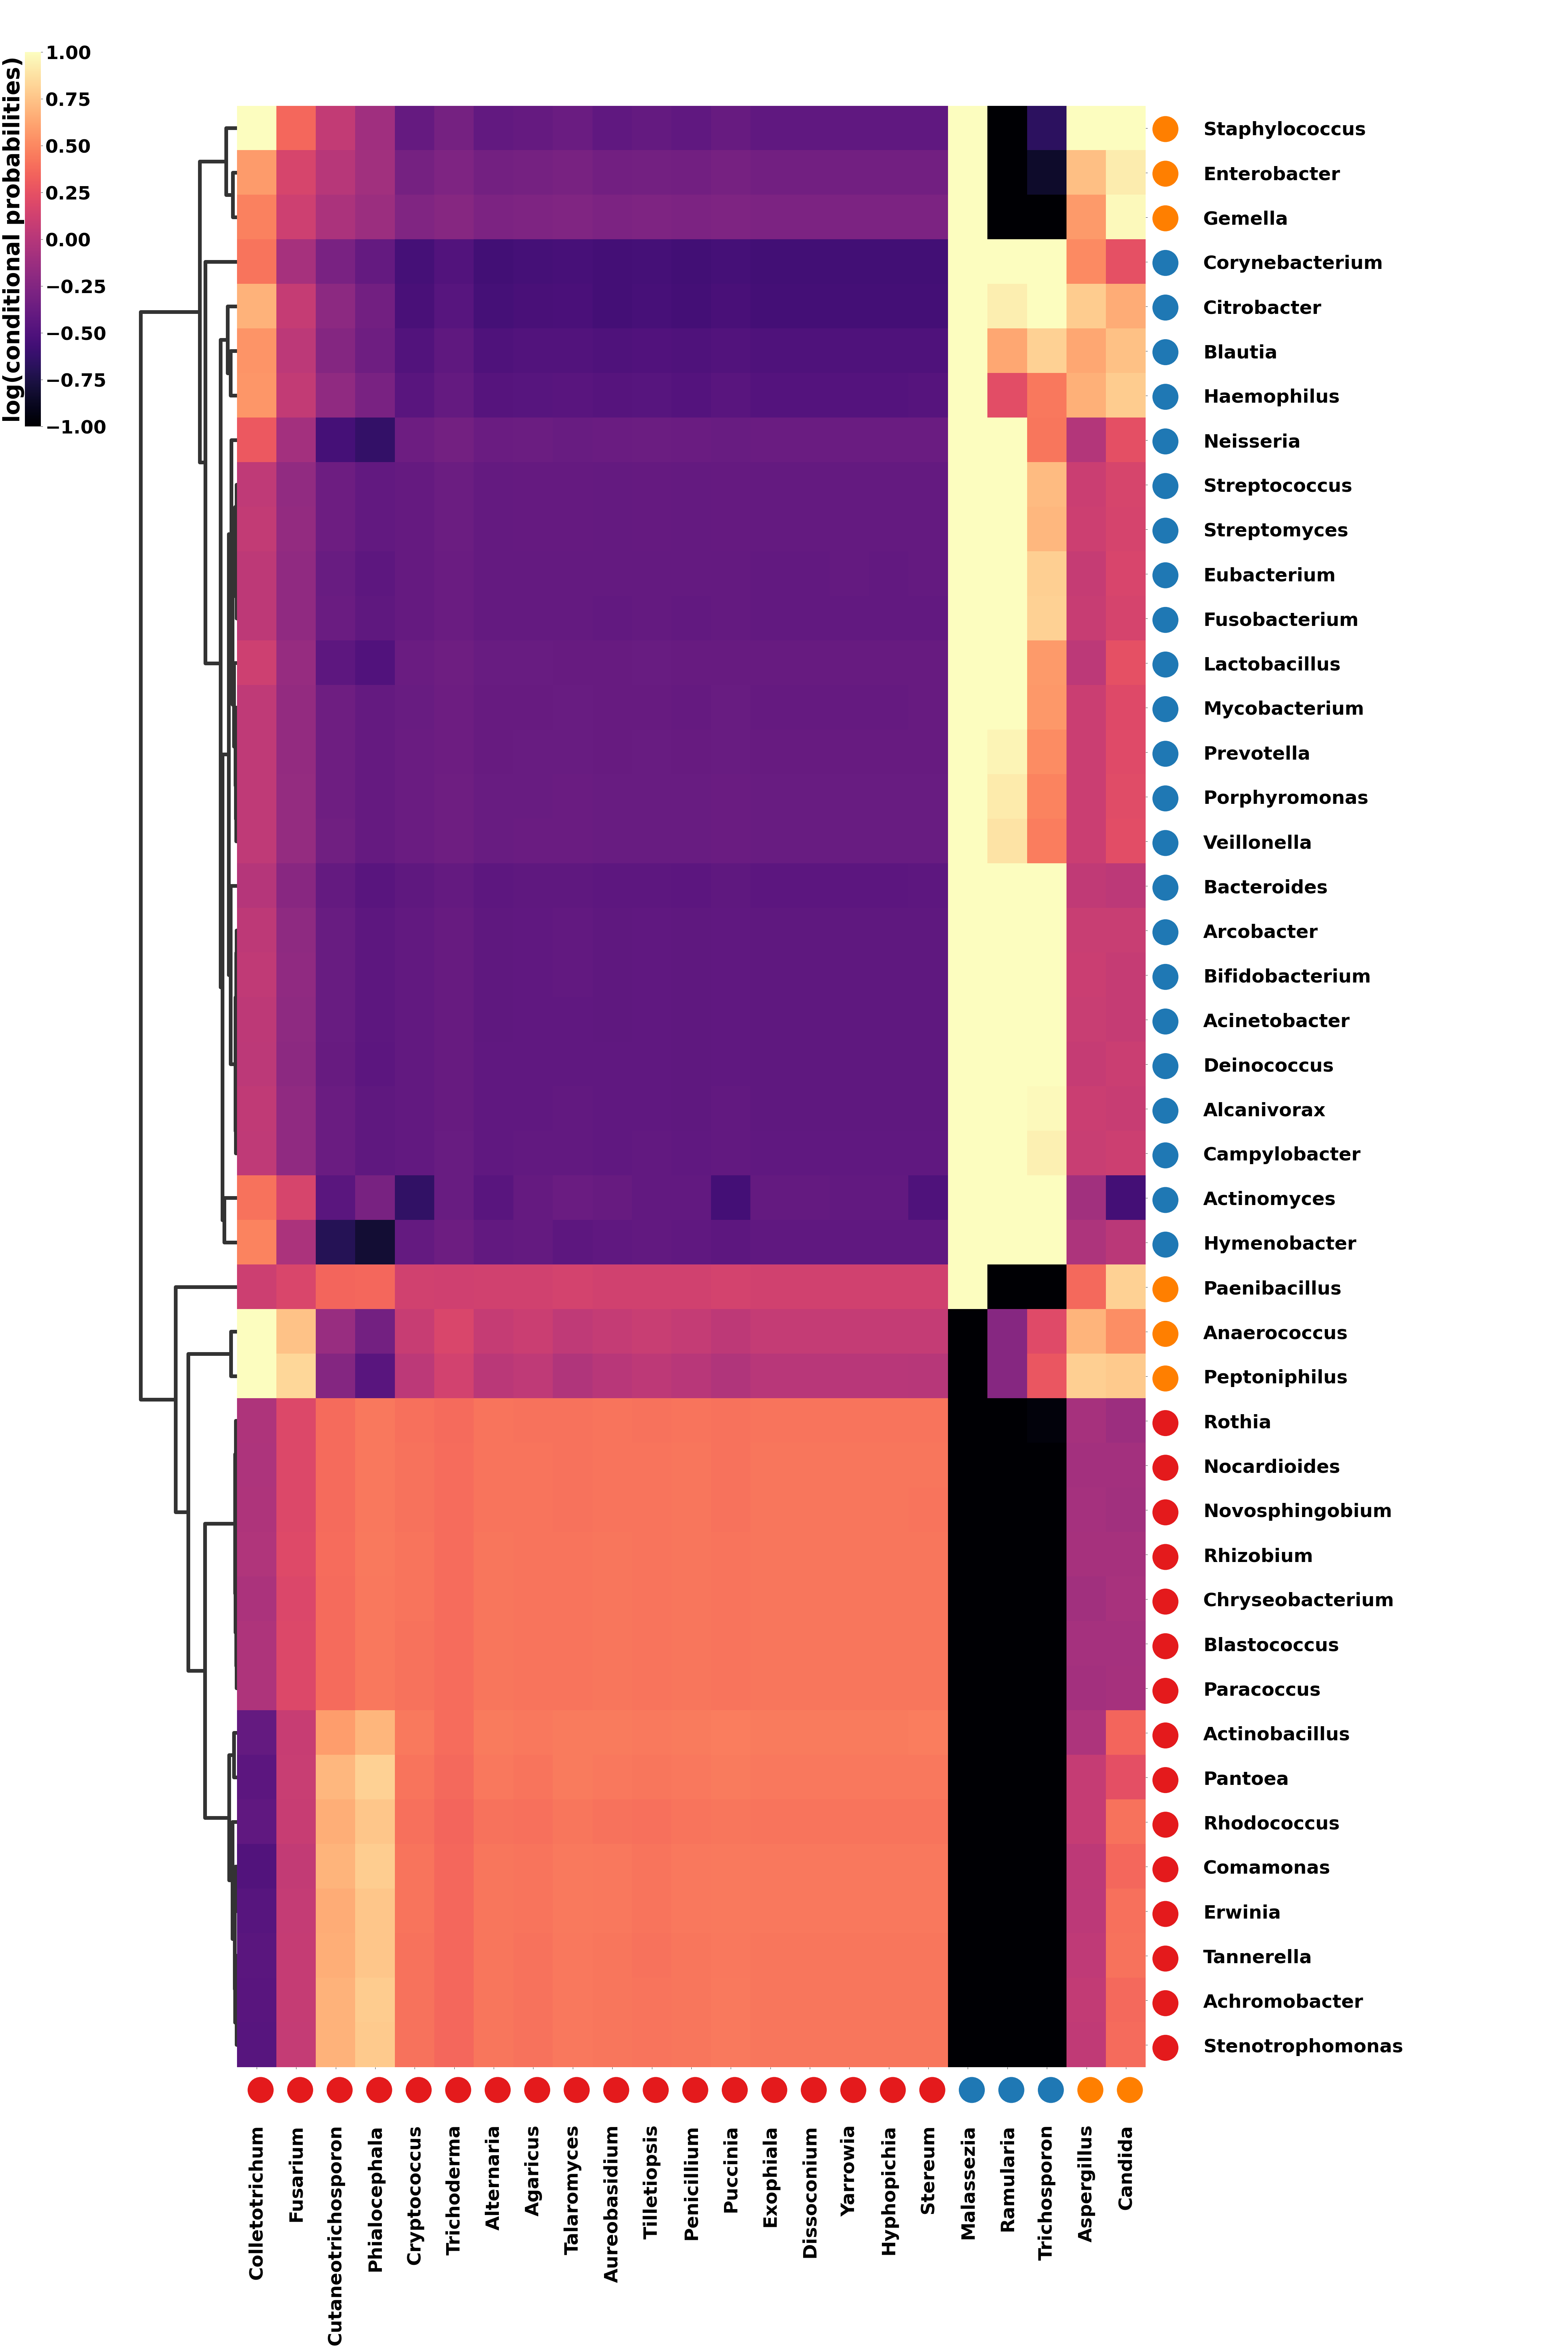

In [12]:
interaction_name = 'fungi-bacteria'
locations = ['Harvard Medical School',
             'Baylor College of Medicine',
             'MDAnderson Institutefor Applied Cancer Science',
            ]

cooccur_probs_bacteria_sem_mean = cooccur_probs_bacteria_sems.abs().mean(1) 
use_sp_low_sem = cooccur_probs_bacteria_sem_mean[cooccur_probs_bacteria_sem_mean < mean_mean].index
fungi_sp_cooccur = use_sp_low_sem

cooccur_probs_bacteria = pd.concat([pd.DataFrame(stats.zscore(all_conditionals[(interaction_name, loc)], axis=1),
                                               all_conditionals[(interaction_name, loc)].index,
                                               all_conditionals[(interaction_name, loc)].columns)
                                  for loc in locations], sort=False)

prev_filt_bacteria = prevelence.loc[use_sp_low_sem, :].mean(1).sort_values().index[- 1 * (len(immune_cell_cooccrrance_clusters) * 2):]
cooccur_probs_bacteria  = cooccur_probs_bacteria.loc[prev_filt_bacteria, :]
cooccur_probs_bacteria = cooccur_probs_bacteria.groupby(cooccur_probs_bacteria.index).mean()

# subset
cooccur_probs_bacteria = cooccur_probs_bacteria.dropna(axis=0)


order_fungi_plot_subset = [v for v in order_fungi_plot if v in  label_coclusters.keys()]

cooccur_probs_bacteria = pd.DataFrame(stats.zscore(cooccur_probs_bacteria, axis=1),
                                    cooccur_probs_bacteria.index,
                                    cooccur_probs_bacteria.columns)[order_fungi_plot_subset]

cooccur_probs_bacteria = pd.DataFrame(stats.zscore(cooccur_probs_bacteria, axis=1),
                                    cooccur_probs_bacteria.index,
                                    cooccur_probs_bacteria.columns)

from matplotlib.pyplot import cm

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12

g = sns.clustermap(cooccur_probs_bacteria,
                   vmax = 1.0,
                   vmin = -1.0,
                   row_cluster=True,
                   col_cluster=False,
                   linewidths=0.0,
                   linecolor='black',
                   yticklabels=True,
                   xticklabels=True,
                   dendrogram_ratio = (.1, .05),
                   colors_ratio = (.01, .01),
                   figsize=(40, 80),
                   cmap="magma",
                   z_score=None)

# Adjust the postion of the main colorbar for the heatmap
g.cax.set_position([-0.1, 0.8, .015, .35 / 2])
g.cax.set_ylabel('log(conditional probabilities)', rotation=90, labelpad=-280,
                 fontsize=60, weight='bold', color='black')
for tick in g.cax.get_yticklabels():
    tick.set_weight('bold')
    tick.set_color("black")
    tick.set_fontsize(50)


g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=50, 
                             color='black', weight='bold', ha='left')
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=50,
                             color='black', weight='bold', ha='center')

g.ax_heatmap.tick_params(axis='both', which='major', pad=150)


g.ax_heatmap.set_xlabel('\n\n' ,color='black',weight='bold',fontsize=100)
g.ax_heatmap.set_ylabel('\n\n\n ' ,color='black',weight='bold',fontsize=100)

for a in g.ax_row_dendrogram.collections:
    a.set_linewidth(10)
for a in g.ax_col_dendrogram.collections:
    a.set_linewidth(10)

    
    
# label rows 
cooccur_probs_bacteria_make_clusters = cooccur_probs_bacteria.copy().stack().reset_index()
cooccur_probs_bacteria_make_clusters['bacteria_labels'] = [label_coclusters[x]
                                                       if x in label_coclusters.keys()
                                                       else 'F3'
                                                       for x in cooccur_probs_bacteria_make_clusters['level_1']]
bacteria_cell_cooccrrance_clusters = {bacteria_cell:bacteria_cell_df.groupby('bacteria_labels').median().sort_values(0).index[-1]
 for bacteria_cell, bacteria_cell_df in cooccur_probs_bacteria_make_clusters.groupby('featureid')}
bacteria_cell_cooccrrance_clusters['Haemophilus'] = 'F1'
order_bacteria_plot = [cooccur_probs_bacteria.index[i] for i in g.dendrogram_row.reordered_ind]
# Annotate the 1st position with a circle patch
x_i = (0.025 / 2)
for _, key_t in enumerate(order_bacteria_plot[::-1]):
    color_ = pal_tmp_cooccrrance_clusters[bacteria_cell_cooccrrance_clusters[key_t]]
    da = DrawingArea(20, 20, 10, 10)
    p = mpatches.Circle((0, 0), 35, facecolor=color_)
    da.add_artist(p)
    ab = AnnotationBbox(da, (23.5, x_i),
                        xybox=(0, -4),
                        xycoords=("data", "axes fraction"),
                        box_alignment=(.5, 1),
                        boxcoords="offset points",
                        bboxprops={"edgecolor" : "none"})
    ab.set_zorder(-1)
    g.ax_heatmap.add_artist(ab)
    x_i += (0.0455 / 2)
    
    
x_i = 0.6
for _, key_t in enumerate(order_fungi_plot):
    if key_t in pal_tmp_fungi_color.keys():
        color_ = pal_tmp_fungi_color[key_t]
    else:
        color_ = pal_tmp_cooccrrance_clusters['F3']
    da = DrawingArea(20, 20, 10, 10)
    p = mpatches.Circle((0, 0), 35, facecolor=color_)
    da.add_artist(p)
    ab = AnnotationBbox(da, (x_i, -0.009),
                        xybox=(0, -4),
                        xycoords=("data", "axes fraction"),
                        box_alignment=(.5, 1),
                        boxcoords="offset points",
                        bboxprops={"edgecolor" : "none"})
    ab.set_zorder(-1)
    g.ax_heatmap.add_artist(ab)
    x_i += 1

    

plt.savefig('../results/figures/fungal_bacteria_cooccurrence/fungal-mean-cooccur-heatmap.pdf', 
            dpi=300, 
            bbox_inches='tight',
            edgecolor='none')
plt.savefig('../results/figures/fungal_bacteria_cooccurrence/fungal-mean-cooccur-heatmap.svg', 
            dpi=300, 
            bbox_inches='tight',
            edgecolor='none')

cooccur_probs_bacteria_save = cooccur_probs_bacteria.loc[[cooccur_probs_bacteria.index[i] for i in g.dendrogram_row.reordered_ind],
                                                         order_fungi_plot]
cooccur_probs_bacteria_save.to_csv('../results/tables/fungal_bacteria_cooccurrence/mmvec-cooccurrence-table.csv')

plt.show()

In [13]:
cooccur_probs_bacteria_save.head(5)

Colletotrichum  Fusarium  Cutaneotrichosporon  Phialocephala  \
featureid                                                                       
Staphylococcus         1.076931  0.363494             0.058034      -0.101879   
Enterobacter           0.579449  0.159969             0.002427      -0.094354   
Gemella                0.473095  0.116939            -0.049420      -0.129261   
Corynebacterium        0.419961 -0.071888            -0.293187      -0.399109   
Citrobacter            0.679191  0.077857            -0.197792      -0.330883   

                 Cryptococcus  Trichoderma  Alternaria  Agaricus  Talaromyces  \
featureid                                                                       
Staphylococcus      -0.396120    -0.318748   -0.412106 -0.396902    -0.374092   
Enterobacter        -0.313827    -0.268216   -0.325465 -0.316645    -0.301356   
Gemella             -0.265390    -0.228410   -0.275179 -0.268088    -0.263114   
Corynebacterium     -0.549479    -0.486509   -0.562595 -0.548434    -0.545437   
Citrobacter         -0.537260    -0.466768   -0.552905 -0.537991    -0.526743   

                 Aureobasidium  ...  Exophiala  Dissoconium  Yarrowia  \
featureid                       ...                                     
Staphylococcus       -0.419299  ...  -0.420256    -0.419841 -0.420535   
Enterobacter         -0.330364  ...  -0.330489    -0.330298 -0.330560   
Gemella              -0.279510  ...  -0.279345    -0.279292 -0.279225   
Corynebacterium      -0.561425  ...  -0.566795    -0.566798 -0.566882   
Citrobacter          -0.555526  ...  -0.558971    -0.558809 -0.559100   

                 Hyphopichia   Stereum  Malassezia  Ramularia  Trichosporon  \
featureid                                                                     
Staphylococcus     -0.419942 -0.417884    3.901241  -1.174722     -0.669010   
Enterobacter       -0.330162 -0.328376    4.202040  -1.202089     -0.839524   
Gemella            -0.278930 -0.277518    4.192343  -1.351336     -1.012311   
Corynebacterium    -0.566540 -0.564968    2.333794   2.463618      2.536628   
Citrobacter        -0.558665 -0.556757    3.881452   0.929858      1.128514   

                 Aspergillus   Candida  
featureid                               
Staphylococcus      1.149598  1.025568  
Enterobacter        0.733330  0.925245  
Gemella             0.571679  0.980064  
Corynebacterium     0.514695  0.246473  
Citrobacter         0.783567  0.653404  

[5 rows x 23 columns]

# log-ratios of fungi, bacteria, and immune cooccurance

In [14]:
"""
Import same tables as used for MMvec
"""

# import metadata with which to make subsets
allseq_mfdf = pd.read_csv('../data/genus_intersected_with_WIS/metadata_immune_WGS_AllSeqCenters_Primary_Tumor.txt',
                          sep='\t', index_col=0)

seq_centers = allseq_mfdf.data_submitting_center_label.value_counts()
seq_centers = seq_centers[seq_centers > 10]
allseq_mfdf = allseq_mfdf[allseq_mfdf.data_submitting_center_label.isin(seq_centers.index)]
allseq_mfdf[allseq_mfdf == 'Not available'] = np.nan

# import tables w/ all (fungi already agg. bact is not)
fungi_bt = load_table('../data/genus_intersected_with_WIS/immune_rep200_counts_fungi_TCGA_AllSeqCenters_WGS_Primary_Tumor.biom')
bacteria_bt = load_table('../data/genus_intersected_with_WIS/immune_rep200_counts_bacteria_TCGA_AllSeqCenters_WGS_Primary_Tumor.biom')
immune_bt = load_table('../data/genus_intersected_with_WIS/immune_cibersort_rel_abund_TCGA_AllSeqCenters_WGS_Primary_Tumor.biom')


/home/cmartino/.conda/envs/qiime2-2019.7/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [15]:
import itertools
from skbio.stats.composition import closure

def log_ratio(num_list, den_list, table_df):
    
    """
    take log-ratio returns a series
    """

    num_counts_ = table_df.loc[num_list, :].sum(0)
    den_counts_ = table_df.loc[den_list, :].sum(0)
    lr = np.log(num_counts_) - np.log(den_counts_)
    lr[~np.isfinite(lr)] = np.nan
    
    return lr

fungal_genus_groupings_lr = fungal_genus_groupings.copy()

# define new lr metadata
thorsson_table = pd.read_csv('../data/thorsson_et_al_2018_tableS1_other_metadata_02Nov21.csv', index_col=0)
allseq_mfdf_lr = pd.concat([allseq_mfdf.copy(), thorsson_table], axis=1)

bacteria_bt_df = pd.DataFrame(bacteria_bt.matrix_data.toarray() + 1, bacteria_bt.ids('observation'), bacteria_bt.ids())
fungi_bt_df = pd.DataFrame(fungi_bt.matrix_data.toarray() + 1, fungi_bt.ids('observation'), fungi_bt.ids())

relabel_back_immune = {v[0]:k for k, v in immune_classes.items()}
immune_bt_df = pd.DataFrame(immune_bt.matrix_data.toarray(), immune_bt.ids('observation'), immune_bt.ids())

lrs_use = []

prev_group = {}
n_group = {}

all_combos = list(itertools.combinations(fungal_genus_groupings_lr.keys(), 2))
#all_combos = all_combos + [('F1F2','F3')]
#fungal_genus_groupings_lr['F1F2'] = fungal_genus_groupings_lr['F1'] + fungal_genus_groupings_lr['F2']

for group_num, group_den in all_combos:
    # get features for log-ratio
    fungi_num = fungal_genus_groupings_lr[group_num]
    fungi_den = fungal_genus_groupings_lr[group_den]
    bacteria_num = [k for k, v in bacteria_cell_cooccrrance_clusters.items() if v in group_num]
    bacteria_den = [k for k, v in bacteria_cell_cooccrrance_clusters.items() if v in group_den]
    immune_num = [k for k, v in immune_cell_cooccrrance_clusters.items() if v in group_num]
    immune_den = [k for k, v in immune_cell_cooccrrance_clusters.items() if v in group_den]
    # take log-ratio
    flr = log_ratio(fungi_num, fungi_den,
                         fungi_bt_df.copy()).reindex(allseq_mfdf_lr.index)
    ilr = log_ratio([relabel_back_immune[i] for i in immune_num],
                    [relabel_back_immune[i] for i in immune_den],
                         immune_bt_df.copy()).reindex(allseq_mfdf_lr.index)
    blr = log_ratio(bacteria_num, bacteria_den,
                         bacteria_bt_df.copy()).reindex(allseq_mfdf_lr.index)
    # save lr
    lrs_use.append('flr_%s_%s' % (group_num, group_den))
    allseq_mfdf_lr['flr_%s_%s' % (group_num, group_den)] = flr
    lrs_use.append('blr_%s_%s' % (group_num, group_den))
    allseq_mfdf_lr['blr_%s_%s' % (group_num, group_den)] = blr
    lrs_use.append('ilr_%s_%s' % (group_num, group_den))
    allseq_mfdf_lr['ilr_%s_%s' % (group_num, group_den)] = ilr
    # cluster info N
    n_group[('fungi',group_num)] = [len(fungi_num)]
    n_group[('bacteria',group_num)] = [len(bacteria_num)]
    n_group[('immune',group_num)] = [len(immune_num)]
    n_group[('fungi',group_den)] = [len(fungi_den)]
    n_group[('bacteria',group_den)] = [len(bacteria_den)]
    n_group[('immune',group_den)] = [len(immune_den)]
    # cluster info prevelence
    prev_group[('fungi',group_num)] = (fungi_bt_df - 1).loc[fungi_num, :].astype(bool).sum(1) / fungi_bt_df.shape[1]
    prev_group[('bacteria',group_num)] = (bacteria_bt_df - 1).loc[bacteria_num, :].astype(bool).sum(1) / bacteria_bt_df.shape[1]
    prev_group[('immune',group_num)] = immune_bt_df.loc[[relabel_back_immune[i] for i in immune_num], :].astype(bool).sum(1) / immune_bt_df.shape[1]
    prev_group[('fungi',group_den)] = (fungi_bt_df - 1).loc[fungi_den, :].astype(bool).sum(1) / fungi_bt_df.shape[1]
    prev_group[('bacteria',group_den)] = (bacteria_bt_df - 1).loc[bacteria_den, :].astype(bool).sum(1) / bacteria_bt_df.shape[1]
    prev_group[('immune',group_den)] = immune_bt_df.loc[[relabel_back_immune[i] for i in immune_den], :].astype(bool).sum(1) / immune_bt_df.shape[1]
    
    
    

#allseq_mfdf_lr = allseq_mfdf_lr.dropna(subset = lrs_use + ['TCGAStudy','data_submitting_center_label'])
allseq_mfdf_lr = allseq_mfdf_lr.dropna(subset = ['TCGAStudy','data_submitting_center_label'])
allseq_mfdf_lr_no_drop_center = allseq_mfdf_lr.copy()
print(allseq_mfdf_lr.shape)

# filter by site and by N of samples in type
org_ctype = set(allseq_mfdf_lr.TCGAStudy)
allseq_mfdf_lr = allseq_mfdf_lr[~allseq_mfdf_lr.data_submitting_center_label.isin(['Broad Institute of MIT and Harvard',
                                                                                   'Washington University School of Medicine'])]
distype = allseq_mfdf_lr.TCGAStudy.value_counts()
distype = distype[distype > 10]
allseq_mfdf_lr = allseq_mfdf_lr[allseq_mfdf_lr.TCGAStudy.isin(distype.index)]

print(allseq_mfdf_lr.shape)
print(len(set(allseq_mfdf_lr.TCGAStudy)))
print(len(set(allseq_mfdf_lr.data_submitting_center_label)))
allseq_mfdf_lr.to_csv('../results/tables/log_ratio_comparisons/TCGA-metadata-plus-log-ratios-mmvec-subset.tsv', sep='\t')

# save subtypes
pd.DataFrame({v_i:[k] for k, v in fungal_genus_groupings_lr.items() for v_i in v}, ['subtypes']).T.to_csv('../results/tables/log_ratio_comparisons/fungal-subtypes.csv')
pd.DataFrame({k:[v] for k, v in bacteria_cell_cooccrrance_clusters.items()}, ['subtypes']).T.to_csv('../results/tables/log_ratio_comparisons/bacterial-subtypes.csv')

    

/home/cmartino/.conda/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/cmartino/.conda/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


(1813, 85)
(1315, 85)
20
3


In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_tables = {}

use_others = ['data_submitting_center_label', 'disease_type', 'ImmuneSubtype']

for resp in lrs_use:
    
    
    resplbl = resp
    allseq_mfdf_lr_subset = allseq_mfdf_lr.dropna(subset=[resp] + use_others)
    if allseq_mfdf_lr_subset.shape[0] < 20:
        continue
    moore_lm = ols("%s ~ C(disease_type) + C(data_submitting_center_label) + C(ImmuneSubtype)" % (resp),
                   data=allseq_mfdf_lr_subset).fit()
    table = sm.stats.anova_lm(moore_lm, typ=1)
    table['samples_left'] = allseq_mfdf_lr_subset.shape[0]
    anova_tables[resplbl] = table
    
anova_tables = pd.concat(anova_tables)
anova_tables['PR(>F)'] = anova_tables['PR(>F)'] * len(lrs_use)
anova_tables.loc[anova_tables['PR(>F)'] > 1, 'PR(>F)'] = 1
anova_tables['PR(>F) < 0.05'] = anova_tables['PR(>F)'] < 0.05

Path("../results/figures/log_ratio_comparisons").mkdir(parents=True, exist_ok=True)
Path("../results/tables/log_ratio_comparisons").mkdir(parents=True, exist_ok=True)

anova_tables.to_csv('../results/tables/log_ratio_comparisons/log-ratios-anovas.csv')
anova_tables

    

df       sum_sq     mean_sq  \
blr_F1_F2 C(disease_type)                    19.0  5372.618620  282.769401   
          C(data_submitting_center_label)     2.0   359.166103  179.583051   
          C(ImmuneSubtype)                    5.0    14.572864    2.914573   
          Residual                         1288.0  1912.478265    1.484843   
blr_F1_F3 C(disease_type)                    19.0  2091.510643  110.079508   
          C(data_submitting_center_label)     2.0    90.580861   45.290430   
          C(ImmuneSubtype)                    5.0     7.702309    1.540462   
          Residual                         1288.0  1501.103636    1.165453   
blr_F2_F3 C(disease_type)                    19.0  1111.240451   58.486340   
          C(data_submitting_center_label)     2.0    89.971803   44.985902   
          C(ImmuneSubtype)                    5.0     5.303586    1.060717   
          Residual                         1288.0  1533.584904    1.190672   
flr_F1_F2 C(disease_type)                    19.0   718.424235   37.811802   
          C(data_submitting_center_label)     2.0     3.295321    1.647660   
          C(ImmuneSubtype)                    5.0     2.932446    0.586489   
          Residual                         1288.0  1456.341638    1.130700   
flr_F1_F3 C(disease_type)                    19.0   134.030149    7.054218   
          C(data_submitting_center_label)     2.0     5.820118    2.910059   
          C(ImmuneSubtype)                    5.0     1.737252    0.347450   
          Residual                         1288.0   842.520884    0.654131   
flr_F2_F3 C(disease_type)                    19.0   471.095308   24.794490   
          C(data_submitting_center_label)     2.0     2.664191    1.332096   
          C(ImmuneSubtype)                    5.0     3.328555    0.665711   
          Residual                         1288.0   932.364711    0.723886   
ilr_F1_F2 C(disease_type)                    19.0   112.758959    5.934682   
          C(data_submitting_center_label)     2.0     0.335083    0.167541   
          C(ImmuneSubtype)                    5.0    21.744141    4.348828   
          Residual                         1288.0   522.314256    0.405523   
ilr_F1_F3 C(disease_type)                    19.0   529.821050   27.885318   
          C(data_submitting_center_label)     2.0     1.110976    0.555488   
          C(ImmuneSubtype)                    5.0    35.949948    7.189990   
          Residual                         1219.0  1597.863114    1.310798   
ilr_F2_F3 C(disease_type)                    19.0   440.901472   23.205341   
          C(data_submitting_center_label)     2.0     1.010005    0.505003   
          C(ImmuneSubtype)                    5.0    26.207969    5.241594   
          Residual                         1219.0  1773.251382    1.454677   

                                                    F         PR(>F)  \
blr_F1_F2 C(disease_type)                  190.437191   0.000000e+00   
          C(data_submitting_center_label)  120.944104   6.594978e-48   
          C(ImmuneSubtype)                   1.962882   7.330694e-01   
          Residual                                NaN            NaN   
blr_F1_F3 C(disease_type)                   94.452110  5.144690e-227   
          C(data_submitting_center_label)   38.860791   3.688241e-16   
          C(ImmuneSubtype)                   1.321771   1.000000e+00   
          Residual                                NaN            NaN   
blr_F2_F3 C(disease_type)                   49.120466  1.443377e-136   
          C(data_submitting_center_label)   37.781959   1.021024e-15   
          C(ImmuneSubtype)                   0.890856   1.000000e+00   
          Residual                                NaN            NaN   
flr_F1_F2 C(disease_type)                   33.441055   3.557146e-97   
          C(data_submitting_center_label)    1.457204   1.000000e+00   
          C(ImmuneSubtype)                   0.518696   1.000000e+00   
        

In [17]:
import itertools
from scipy.stats import spearmanr


corr_lrs = pd.DataFrame({(x, y):spearmanr(allseq_mfdf_lr.dropna(subset=[x,y])[x],
                                          allseq_mfdf_lr.dropna(subset=[x,y])[y]) 
                         for x, y in list(itertools.combinations(lrs_use, 2))}, ['corr', 'P']).T
corr_lrs.to_csv('../results/tables/log_ratio_comparisons/spearman-log-ratios-sample-correlations.csv')



findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


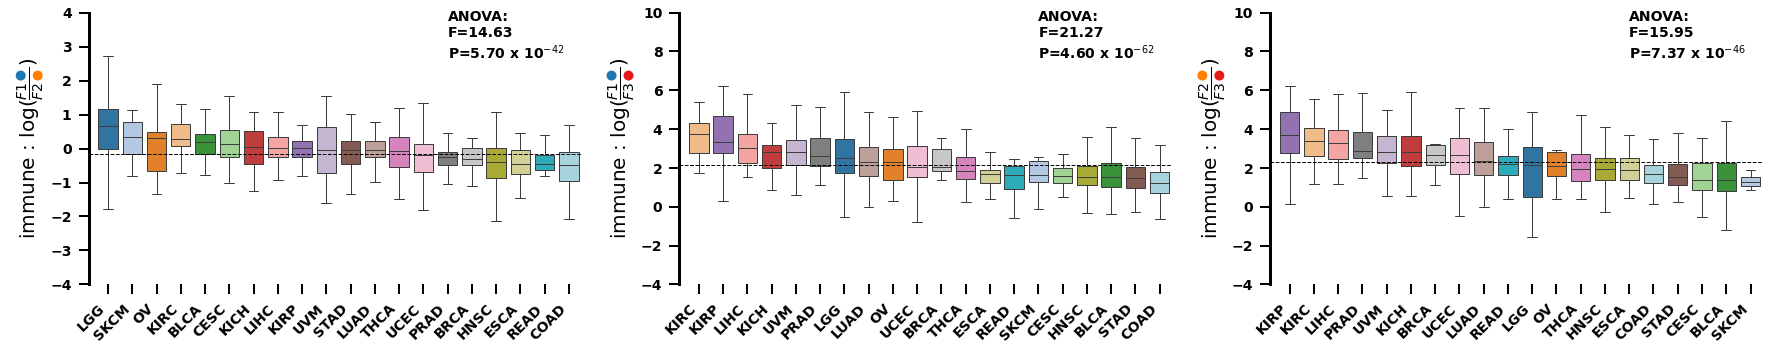

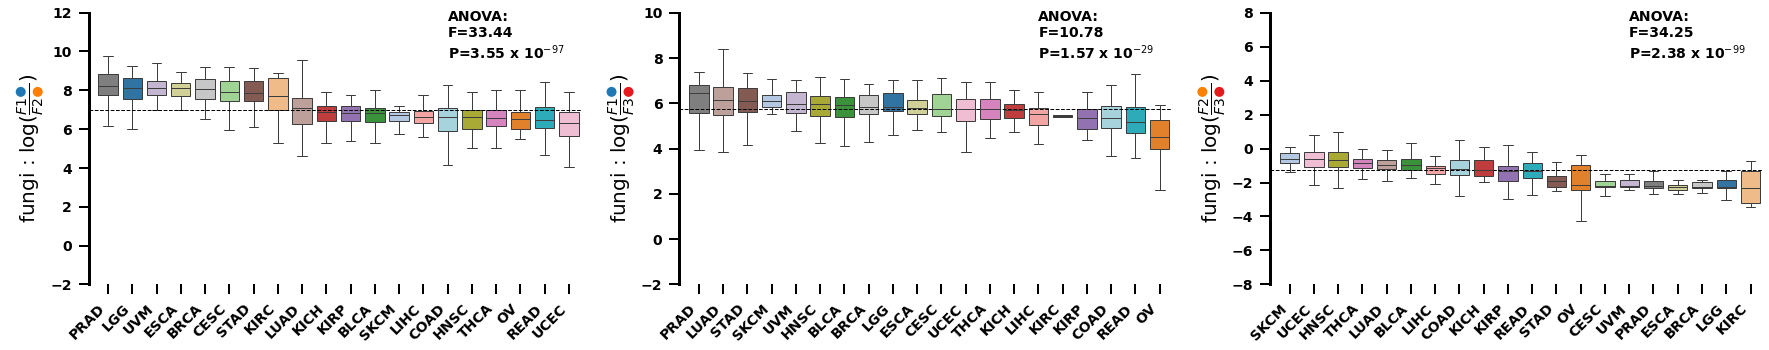

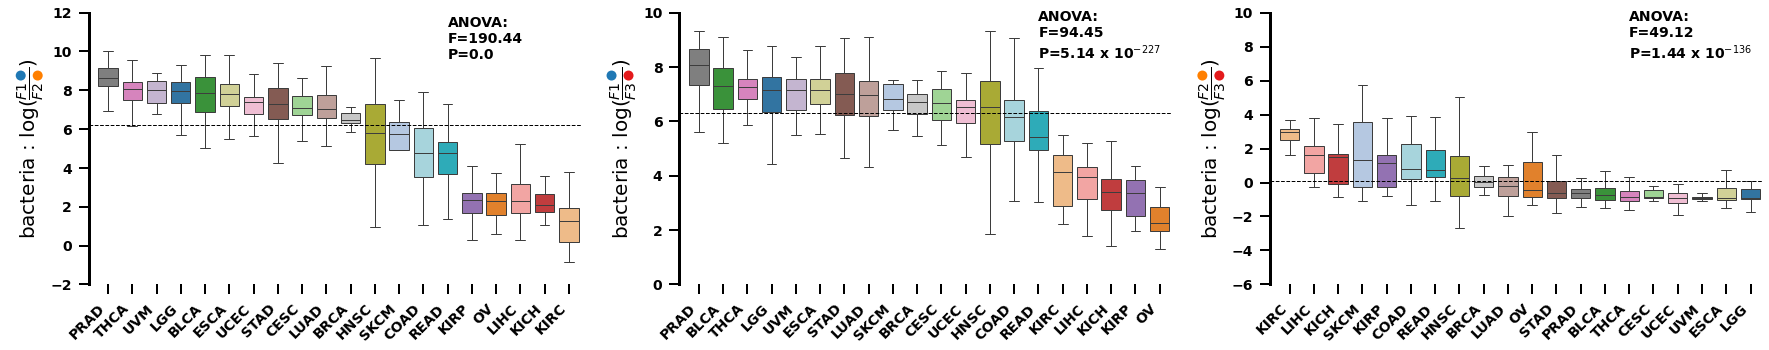

In [18]:
## from matplotlib.pyplot import cm

import math

def round_up_to_even(f):
    return math.ceil(f / 2.) * 2
def round_down_to_even(f):
    return math.floor(f / 2.) * 2

# plot labels
pairs_plot = set([(x.split('_')[1], x.split('_')[2]) for x in lrs_use])
pairs_plot = [('F1', 'F2'), ('F1', 'F3'), ('F2', 'F3')]
ratio_labels = {'flr_':{x + '_' + y:'fungi : $\\log(\\frac{%s\,\,\,\,\,\,}{%s\,\,\,\,\,\,})$' % (x, y) for x, y in  pairs_plot},
               'ilr_':{x + '_' + y:'immune : $\\log(\\frac{%s\,\,\,\,\,\,}{%s\,\,\,\,\,\,})$' % (x, y) for x, y in  pairs_plot},
                'blr_':{x + '_' + y:'bacteria : $\\log(\\frac{%s\,\,\,\,\,\,}{%s\,\,\,\,\,\,})$' % (x, y) for x, y in  pairs_plot}}


pal_tmp_cooccrrance_clusters = pal_tmp_cooccrrance_clusters.copy()
pal_tmp_cooccrrance_clusters['F1F2'] = '#e31a1c'
x_col_use = 'TCGAStudy'

ordered_list_dis_types = {}

encode_stirngs = {p:i for i, p in enumerate(set(allseq_mfdf_lr[x_col_use]))}
lr_col_use = 'ilr_F1_F2'
order_color = allseq_mfdf_lr.groupby(x_col_use).median()[lr_col_use].sort_values(ascending=False).index
colors_plot = list(cm.tab20(np.linspace(0, 1, 20))) + list(cm.tab20b(np.linspace(0, 1, 20)))
pal_tmp = {t:c for t, c in zip(order_color, colors_plot)}
ctype_pal = pal_tmp

for lr_prefix in ['ilr_', 'flr_', 'blr_']:
    
    fig, axn = plt.subplots(1, len(pairs_plot) , figsize=(10 * len(pairs_plot), 5))
    #fig, axn = plt.subplots(1, 1 , figsize=(10, 5))
    #axn = [axn]
    
    for ax, lr_suffix in zip(axn, [x + '_' + y for x, y in pairs_plot]):
        
        
        lr_col_use = lr_prefix + lr_suffix

        order_plot_x = allseq_mfdf_lr.groupby([x_col_use]).median()[lr_col_use].sort_values(ascending=False).index
        ordered_list_dis_types[lr_col_use] = [encode_stirngs[x_] for x_ in order_plot_x]
        ordered_list_dis_types[lr_col_use] = order_plot_x
        #sns.swarmplot(x=x_col_use, y=lr_col_use, 
        #              order=order_plot_x,
        #              data=allseq_mfdf_lr, s=1,
        #              color='black', ax=ax)
        sns.boxplot(x=x_col_use, y=lr_col_use,
                    order=order_plot_x,
                    data=allseq_mfdf_lr,
                    showfliers=False,
                    palette=pal_tmp, ax=ax)
        ax.axhline(allseq_mfdf_lr[lr_col_use].mean(), lw=1, ls='--', color='black')

        ax.grid(False)
        ax.set_facecolor('white')
        ax.set_axisbelow(True)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        for sp_i in ax.spines.values():
            sp_i.set_linewidth(3)
        for child in ax.get_children():
            if isinstance(child, matplotlib.spines.Spine):
                child.set_color('black')
        ax.tick_params(axis='y', colors='black', width=2, length=10)
        ax.tick_params(axis='x', colors='black', width=2, length=10)

        for tick in ax.get_xticklabels():
            tick.set_fontproperties('arial')
            tick.set_ha('right')
            tick.set_rotation(45)
            tick.set_weight("bold")
            tick.set_color("black")
            tick.set_fontsize(14)

        for tick in ax.get_yticklabels():
            tick.set_fontproperties('arial')
            tick.set_weight("bold")
            tick.set_color("black")
            tick.set_fontsize(14)

        ax.set_xlabel('',
                          fontsize=14,
                          family = 'arial',
                          weight='normal',
                          color='black')
        ax.set_xlim(-0.8, )

        ax.spines['left'].set_bounds(round_down_to_even(allseq_mfdf_lr[lr_col_use].min()),
                                     round_up_to_even(allseq_mfdf_lr[lr_col_use].max()))
        ax.set_ylim(round_down_to_even(allseq_mfdf_lr[lr_col_use].min()),
                    round_up_to_even(allseq_mfdf_lr[lr_col_use].max()))
        

        ax.set_ylabel(ratio_labels[lr_prefix][lr_suffix],
                  fontsize=20,
                  family = 'arial',
                  weight='normal',
                  color='black')

        # Annotate the 1st position with a circle patch
        y_map = {'ilr_':0.82, 'blr_':0.82, 'flr_':0.76}
        for ind_, (x_, y_) in {lr_suffix.split('_')[0].upper():(-3.6, y_map[lr_prefix]),
                               lr_suffix.split('_')[1].upper():(-2.9, y_map[lr_prefix])}.items():
            color_ = pal_tmp_cooccrrance_clusters[ind_]
            da = DrawingArea(20, 20, 10, 10)
            p = mpatches.Circle((0, 0), 5, facecolor=color_)
            da.add_artist(p)
            ab = AnnotationBbox(da, (x_, y_),
                                xybox=(0, -4),
                                xycoords=("data", "axes fraction"),
                                box_alignment=(.5, 1),
                                boxcoords="offset points",
                                bboxprops={"edgecolor" : "none", "alpha":0.0})
            ab.set_zorder(-1)
            ax.add_artist(ab)
            
        f_, p_val  = anova_tables.loc[(lr_col_use, 'C(disease_type)'), ['F','PR(>F)']].values
        p_val = str(p_val)
        if 'e' in p_val:
            p_val = p_val[:4] + " x 10$^{%s}$" % p_val[list(p_val).index('e') + 1:]
        else:
            p_val = p_val[:6]
        stat_txt = 'ANOVA:\nF=%.2f\nP=%s' % (f_, p_val)
        ax.annotate(stat_txt, (len(set(allseq_mfdf_lr[x_col_use])) - 6, 0.83), 
                    xycoords=("data", "axes fraction"),
                    color='black', weight='bold', fontsize=14)

    plt.savefig('../results/figures/log_ratio_comparisons/%s-log-ratio-by-TCGA-tumor-types.pdf' % (lr_col_use.split('_')[0]),
                dpi=300, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')
    plt.savefig('../results/figures/log_ratio_comparisons/%s-log-ratio-by-TCGA-tumor-types.svg' % (lr_col_use.split('_')[0]),
                dpi=300, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')

    plt.show()
    
    



findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


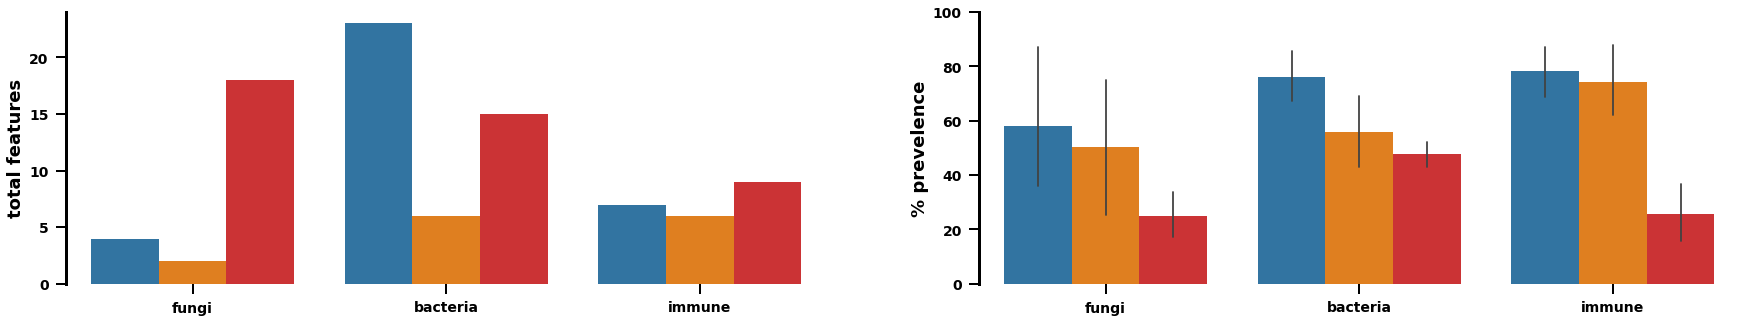

In [19]:
group_prev_df = pd.DataFrame([list(k) + [v_i * 100] for k, v in prev_group.items() for v_i in v.values]) 
group_prev_df.columns = ['group','subtype','% prevelence']

group_desc_df = pd.DataFrame(n_group)
group_desc_df = group_desc_df.T.reset_index()
group_desc_df.columns = ['group','subtype','total features']

fig, axn = plt.subplots(1, 2, figsize=(30, 5))

for ax, df_plot, y_col in zip(axn, [group_desc_df, group_prev_df], ['total features', '% prevelence']):
    
    
    sns.barplot(y=y_col, x='group', hue='subtype',
                palette=pal_tmp_cooccrrance_clusters,
                data=df_plot, ax=ax)

    ax.grid(False)
    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for sp_i in ax.spines.values():
        sp_i.set_linewidth(3)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black', width=2, length=10)
    ax.tick_params(axis='x', colors='black', width=2, length=10)

    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(14)

    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight("bold")
        tick.set_color("black")
        tick.set_fontsize(14)

    ax.set_xlabel('',
                      fontsize=14,
                      family = 'arial',
                      weight='normal',
                      color='black')

    ax.set_ylabel(y_col,
                      fontsize=18,
                      family = 'arial',
                      weight='bold',
                      color='black')

    ax.spines['left'].set_bounds(0, round_up_to_even(df_plot[y_col].max()))
    ax.set_ylim(0, round_up_to_even(df_plot[y_col].max()))
        
    ax.legend_.remove()
    
    
plt.savefig('../results/figures/log_ratio_comparisons/prev-totals.pdf',
            dpi=300, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
plt.savefig('../results/figures/log_ratio_comparisons/prev-totals.svg',
            dpi=300, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()
    

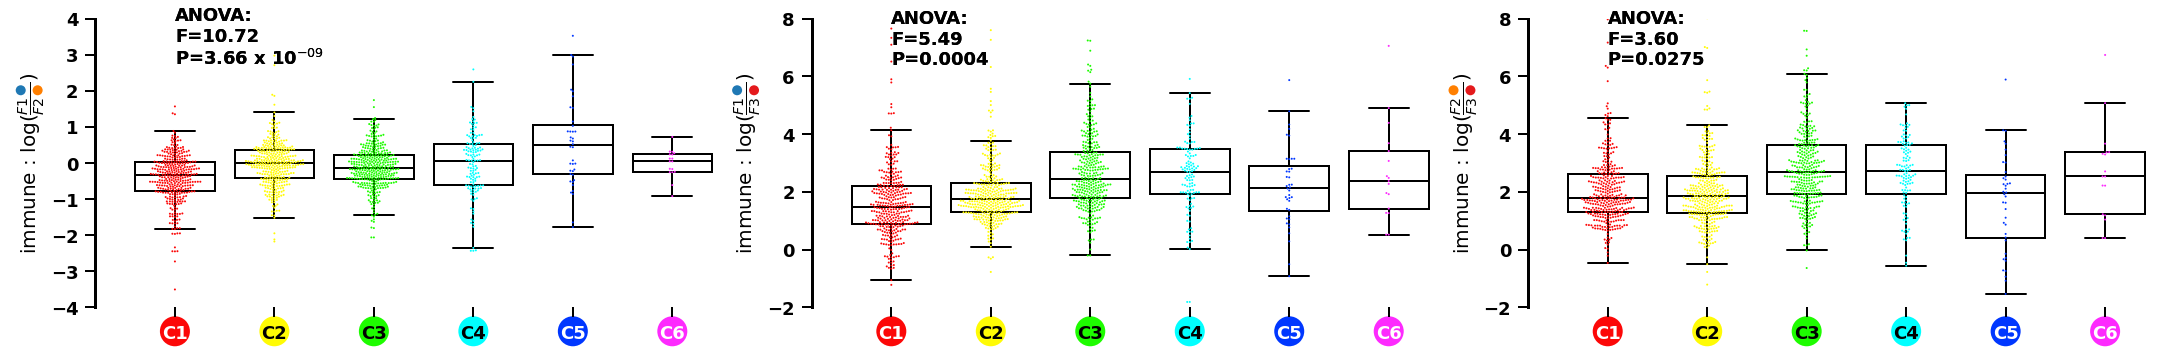

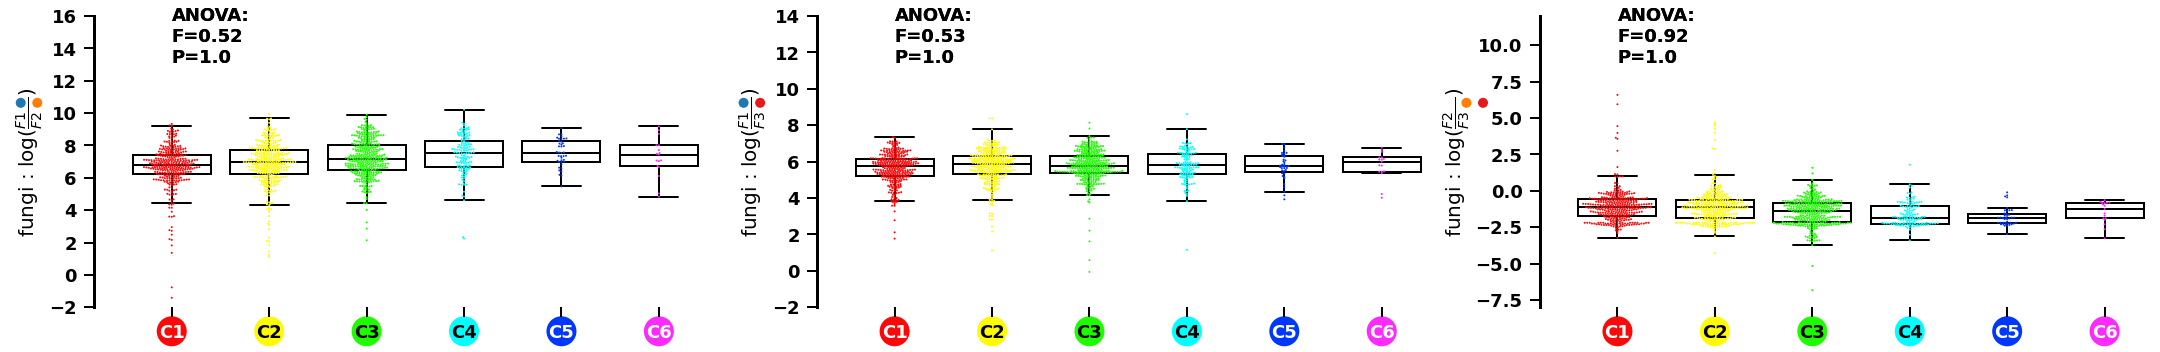

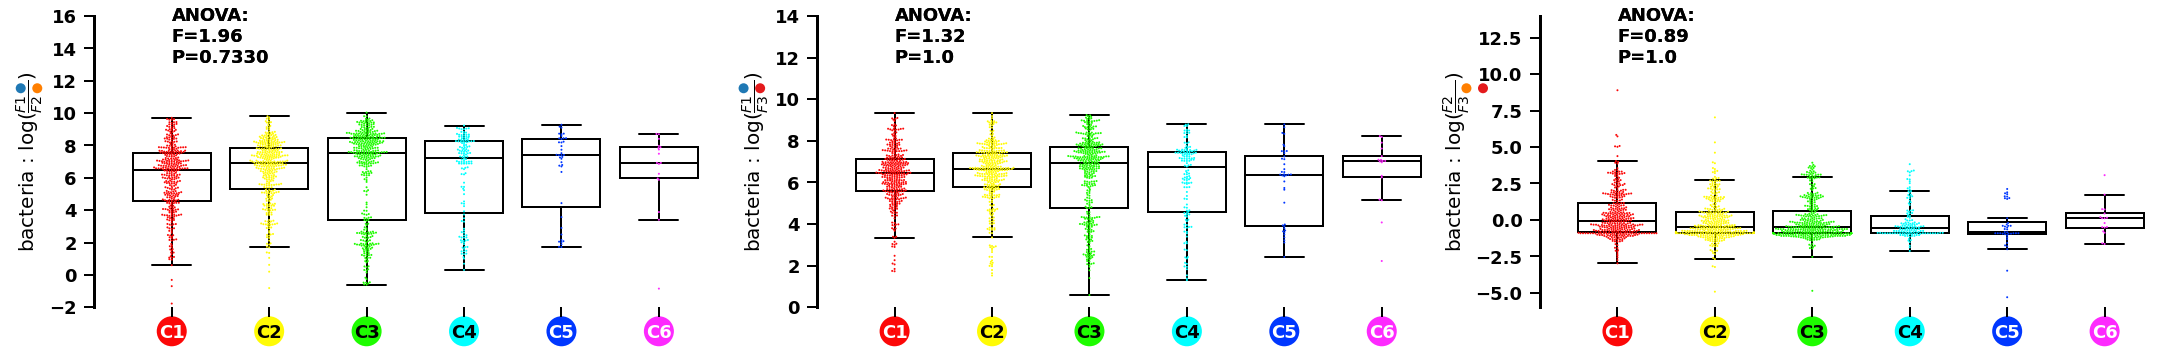

In [20]:
import matplotlib.patches as mpatches
from matplotlib.offsetbox import (DrawingArea, AnnotationBbox)

pal_tmp = {'C1':'#fc0808', 'C2':'#fffb05', 'C3':'#1efc00', 
           'C4':'#01ffff', 'C5':'#0037ff', 'C6':'#fd2afe'}
ratio_labels = {'flr_':{x + '_' + y:'fungi : $\\log(\\frac{%s\,\,\,\,\,\,}{%s\,\,\,\,\,\,})$' % (x, y) for x, y in  pairs_plot},
               'ilr_':{x + '_' + y:'immune : $\\log(\\frac{%s\,\,\,\,\,\,}{%s\,\,\,\,\,\,})$' % (x, y) for x, y in  pairs_plot},
                'blr_':{x + '_' + y:'bacteria : $\\log(\\frac{%s\,\,\,\,\,\,}{%s\,\,\,\,\,\,})$' % (x, y) for x, y in  pairs_plot}}



for lr_prefix in ['ilr_', 'flr_', 'blr_']:
    
    fig, axn = plt.subplots(1, len(pairs_plot) , figsize=(10 * len(pairs_plot), 5))
    #fig, axn = plt.subplots(1, 1 , figsize=(10, 5))
    #axn = [axn]
    
    for ax, lr_suffix in zip(axn, [x + '_' + y for x, y in pairs_plot]):
        

        lr_col_use = lr_prefix + lr_suffix


        sns.swarmplot(x='ImmuneSubtype', y=lr_col_use, 
                      order=pal_tmp.keys(),
                      data=allseq_mfdf_lr, s=2,
                      palette=pal_tmp, ax=ax)
        sns.boxplot(x='ImmuneSubtype', y=lr_col_use,
                    order=pal_tmp.keys(),
                    data=allseq_mfdf_lr,
                    showfliers=False,linewidth=2,
                    color='white', ax=ax)
        # iterate over boxes
        for i,box in enumerate(ax.artists):
            box.set_edgecolor('black')
            box.set_facecolor('white')

            # iterate over whiskers and median lines
            for j in range(5*i,5*(i+1)):
                 ax.lines[j].set_color('black')
        #ax.axvline(allseq_mfdf_lr[lr_col_use].mean(), lw=2, ls='--', color='black')

        ax.grid(False)
        ax.set_facecolor('white')
        ax.set_axisbelow(True)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        for sp_i in ax.spines.values():
            sp_i.set_linewidth(3)
        for child in ax.get_children():
            if isinstance(child, matplotlib.spines.Spine):
                child.set_color('black')
        ax.tick_params(axis='y', colors='black', width=2, length=10)
        ax.tick_params(axis='x', colors='black', width=2, length=10)

        for tick in ax.get_xticklabels():
            tick.set_fontproperties('arial')
            tick.set_weight("bold")
            tick.set_color("black")
            tick.set_fontsize(18)

        for tick in ax.get_yticklabels():
            tick.set_fontproperties('arial')
            tick.set_weight("bold")
            tick.set_color("black")
            tick.set_fontsize(18)

        """ax.set_title(lr_col_use.split('_')[0],
                      fontsize=22,
                      family = 'arial',
                      weight='bold',
                      color='black')"""

        ax.set_xlim(-0.8, )
        if 'ilr' in lr_col_use:
            if lr_col_use.split('_')[-1] == 'F2':
                ax.spines['left'].set_bounds(round_down_to_even(allseq_mfdf_lr[lr_col_use].min()),
                                             round_up_to_even(allseq_mfdf_lr[lr_col_use].max()))
                ax.set_ylim(round_down_to_even(allseq_mfdf_lr[lr_col_use].min()),
                            round_up_to_even(allseq_mfdf_lr[lr_col_use].max()))
            else:
                ax.spines['left'].set_bounds(round_down_to_even(allseq_mfdf_lr[lr_col_use].min() + 2),
                                             round_up_to_even(allseq_mfdf_lr[lr_col_use].max()) - 2)
                ax.set_ylim(round_down_to_even(allseq_mfdf_lr[lr_col_use].min() + 2),
                            round_up_to_even(allseq_mfdf_lr[lr_col_use].max()) - 2)
        else:
            ax.spines['left'].set_bounds(round_down_to_even(allseq_mfdf_lr[lr_col_use].min()),
                                         round_up_to_even(allseq_mfdf_lr[lr_col_use].max()) + 4)
            ax.set_ylim(round_down_to_even(allseq_mfdf_lr[lr_col_use].min()),
                        round_up_to_even(allseq_mfdf_lr[lr_col_use].max()) + 4)

        ax.set_xlabel('',
                          fontsize=14,
                          family = 'arial',
                          weight='bold',
                          color='black')

        # Annotate the 1st position with a circle patch
        for x_i, (key_t, color_) in enumerate(pal_tmp.items()):
            da = DrawingArea(20, 20, 10, 10)
            p = mpatches.Circle((0, 0), 15, facecolor=color_)
            da.add_artist(p)
            ab = AnnotationBbox(da, (x_i, 0),
                                xybox=(0, -14),
                                xycoords=("data", "axes fraction"),
                                box_alignment=(.5, 1),
                                boxcoords="offset points",
                                bboxprops={"edgecolor" : "none"})
            ab.set_zorder(-1)
            ax.add_artist(ab)
        ax.get_xticklabels()[0].set_color("white")
        ax.get_xticklabels()[4].set_color("white")
        ax.get_xticklabels()[5].set_color("white")

        
        ax.set_ylabel(ratio_labels[lr_prefix][lr_suffix],
                  fontsize=20,
                  family = 'arial',
                  weight='normal',
                  color='black')

        # Annotate the 1st position with a circle patch
        y_map = {'ilr_':0.8, 'blr_':0.8, 'flr_':0.75}
        for ind_, (x_, y_) in {lr_suffix.split('_')[0].upper():(-1.55, y_map[lr_prefix]),
                               lr_suffix.split('_')[1].upper():(-1.38, y_map[lr_prefix])}.items():
            color_ = pal_tmp_cooccrrance_clusters[ind_]
            da = DrawingArea(20, 20, 10, 10)
            p = mpatches.Circle((0, 0), 5, facecolor=color_)
            da.add_artist(p)
            ab = AnnotationBbox(da, (x_, y_),
                                xybox=(0, -4),
                                xycoords=("data", "axes fraction"),
                                box_alignment=(.5, 1),
                                boxcoords="offset points",
                                bboxprops={"edgecolor" : "none", "alpha":0.0})
            ab.set_zorder(-1)
            ax.add_artist(ab)

    
            f_, p_val  = anova_tables.loc[(lr_col_use, 'C(ImmuneSubtype)'), ['F','PR(>F)']].values
            p_val = str(p_val)
            if 'e' in p_val:
                p_val = p_val[:4] + " x 10$^{%s}$" % p_val[list(p_val).index('e') + 1:]
            else:
                p_val = p_val[:6]
            stat_txt = 'ANOVA:\nF=%.2f\nP=%s' % (f_, p_val)
            ax.annotate(stat_txt, (0, 0.84), 
                        xycoords=("data", "axes fraction"),
                        color='black', weight='bold', fontsize=18)
        
    plt.tight_layout()

    plt.savefig('../results/figures/log_ratio_comparisons/%s-log-ratio-by-immune-subtypes.pdf' % (lr_col_use.split('_')[0]),
                dpi=300, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')
    plt.savefig('../results/figures/log_ratio_comparisons/%s-log-ratio-by-immune-subtypes.svg' % (lr_col_use.split('_')[0]),
                dpi=300, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')
    plt.show()
    
    
    

In [21]:
immune_sub_combos = list(itertools.combinations(set(allseq_mfdf_lr['ImmuneSubtype']), 2))

pairwise_immune = {(col, combo_[0], combo_[1]): ttest_ind(allseq_mfdf_lr[allseq_mfdf_lr.ImmuneSubtype == combo_[0]][col].dropna(),
                                                          allseq_mfdf_lr[allseq_mfdf_lr.ImmuneSubtype == combo_[1]][col].dropna())
                   for combo_ in immune_sub_combos
                   for col in ['ilr_F1_F2','ilr_F1_F3','ilr_F2_F3']}
pairwise_immune = pd.DataFrame(pairwise_immune, ['t', 'p-value']).T.reset_index().rename({'level_0':'ratio',
                                                                                    'level_1':'group_one',
                                                                                    'level_2':'group_two'}, axis=1)

def fdr(p_vals, correction_n):

    fdr = p_vals * correction_n 
    fdr[fdr > 1] = 1

    return fdr

pairwise_immune['q-value'] = fdr(pairwise_immune['p-value'].values, len(immune_sub_combos))
pairwise_immune['significant'] = False
pairwise_immune.loc[pairwise_immune['q-value'] < 0.05, 'significant'] = True
pairwise_immune.to_csv('../results/tables/log_ratio_comparisons/pairwise-immune-subtypes-immune-ratios.csv')
pairwise_immune


ratio group_one group_two          t       p-value       q-value  \
0   ilr_F1_F2        C2        C1   8.059942  3.106353e-15  4.659530e-14   
1   ilr_F1_F3        C2        C1   3.907821  1.019399e-04  1.529099e-03   
2   ilr_F2_F3        C2        C1  -0.645600  5.187448e-01  1.000000e+00   
3   ilr_F1_F2        C2        C4  -0.077291  9.384225e-01  1.000000e+00   
4   ilr_F1_F3        C2        C4  -5.220224  2.649013e-07  3.973520e-06   
5   ilr_F2_F3        C2        C4  -4.930395  1.126680e-06  1.690020e-05   
6   ilr_F1_F2        C2        C5  -4.853882  1.725518e-06  2.588277e-05   
7   ilr_F1_F3        C2        C5  -1.246410  2.133343e-01  1.000000e+00   
8   ilr_F2_F3        C2        C5   1.669853  9.572109e-02  1.000000e+00   
9   ilr_F1_F2        C2        C3   2.097575  3.627503e-02  5.441254e-01   
10  ilr_F1_F3        C2        C3  -8.144655  1.707354e-15  2.561030e-14   
11  ilr_F2_F3        C2        C3  -8.767209  1.339623e-17  2.009435e-16   
12  ilr_F1_F2        C2        C6  -0.142570  8.867038e-01  1.000000e+00   
13  ilr_F1_F3        C2        C6  -2.556311  1.096489e-02  1.644734e-01   
14  ilr_F2_F3        C2        C6  -2.261784  2.427222e-02  3.640832e-01   
15  ilr_F1_F2        C1        C4  -5.341667  1.401079e-07  2.101618e-06   
16  ilr_F1_F3        C1        C4  -7.083224  5.119836e-12  7.679754e-11   
17  ilr_F2_F3        C1        C4  -4.294351  2.126245e-05  3.189367e-04   
18  ilr_F1_F2        C1        C5  -7.755984  7.320790e-14  1.098119e-12   
19  ilr_F1_F3        C1        C5  -2.646892  8.451816e-03  1.267772e-01   
20  ilr_F2_F3        C1        C5   1.868490  6.244134e-02  9.366200e-01   
21  ilr_F1_F2        C1        C3  -6.445832  2.063081e-10  3.094622e-09   
22  ilr_F1_F3        C1        C3 -10.878218  1.450688e-25  2.176032e-24   
23  ilr_F2_F3        C1        C3  -7.900640  1.083128e-14  1.624692e-13   
24  ilr_F1_F2        C1        C6  -2.496368  1.297232e-02  1.945848e-01   
25  ilr_F1_F3        C1        C6  -3.214540  1.421998e-03  2.132997e-02   
26  ilr_F2_F3        C1        C6  -1.972439  4.930782e-02  7.396173e-01   
27  ilr_F1_F2        C4        C5  -3.249969  1.381480e-03  2.072221e-02   
28  ilr_F1_F3        C4        C5   1.582535  1.154900e-01  1.000000e+00   
29  ilr_F2_F3        C4        C5   3.749706  2.465263e-04  3.697894e-03   
30  ilr_F1_F2        C4        C3   1.464519  1.436542e-01  1.000000e+00   
31  ilr_F1_F3        C4        C3  -0.798577  4.249419e-01  1.000000e+00   
32  ilr_F2_F3        C4        C3  -1.513790  1.307556e-01  1.000000e+00   
33  ilr_F1_F2        C4        C6  -0.075814  9.396657e-01  1.000000e+00   
34  ilr_F1_F3        C4        C6  -0.200438  8.414334e-01  1.000000e+00   
35  ilr_F2_F3        C4        C6  -0.141003  8.880735e-01  1.000000e+00   
36  ilr_F1_F2        C5        C3   6.012960  3.941198e-09  5.911798e-08   
37  ilr_F1_F3        C5        C3  -2.258094  2.450050e-02  3.675076e-01   
38  ilr_F2_F3        C5        C3  -5.013889  8.163325e-07  1.224499e-05   
39  ilr_F1_F2        C5        C6   1.795415  7.808216e-02  1.000000e+00   
40  ilr_F1_F3        C5        C6  -1.085011  2.826497e-01  1.000000e+00   
41  ilr_F2_F3        C5        C6  -2.099250  4.039814e-02  6.059721e-01   
42  ilr_F1_F2        C3        C6  -0.805507  4.210058e-01  1.000000e+00   
43  ilr_F1_F3        C3        C6   0.118603  9.056557e-01  1.000000e+00   
44  ilr_F2_F3        C3        C6   0.483252  6.292097e-01  1.000000e+00   

    significant  
0          True  
1          True  
2         False  
3         False  
4          True  
5          True  
6          True  
7         False  
8         False  
9         False  
10         True  
11         True  
12        False  
13        False  
14        False  
15         True  
16         True  
17         True  
18         True  
19        False  
20        False  
21         True  
22         True  
23         True  
24        False  
25         True  
26        False  
27     

In [22]:
from scipy.stats import kendalltau

result_corr_rank = {}

def create_rank(a):
    """ Convert an ordered list to a DataFrame with ranks. """
    return pd.DataFrame(
                  zip(a, range(len(a))),
                  columns=['key', 'rank'])\
             .set_index('key')

def join_ranks(rank_a, rank_b):
    """ Join two rank DataFrames. """
    return rank_a.join(rank_b, lsuffix='_a', rsuffix='_b', how='outer')

for x_c, y_c in list(itertools.combinations(lrs_use, 2)):

    list_a = ordered_list_dis_types[x_c]
    list_b = ordered_list_dis_types[y_c]
    ranks = join_ranks(create_rank(list_a),
                       create_rank(list_b)).fillna(len(list_a))
    result_corr_rank[(x_c, y_c)] = kendalltau(ranks['rank_a'], ranks['rank_b'])

result_corr_rank = pd.DataFrame(result_corr_rank, ['tau','P']).T
result_corr_rank.to_csv('../results/tables/log_ratio_comparisons/TCGA-tumor-types-order-correlation-tau.csv')
result_corr_rank[result_corr_rank['P'] < 0.05]
#result_corr_rank


tau             P
flr_F1_F2 flr_F1_F3  0.389474  1.640608e-02
          blr_F1_F3  0.389474  1.640608e-02
          flr_F2_F3 -0.505263  1.427311e-03
blr_F1_F2 flr_F1_F3  0.389474  1.640608e-02
          blr_F1_F3  0.768421  1.035295e-07
          blr_F2_F3 -0.684211  5.104710e-06
flr_F1_F3 blr_F1_F3  0.536842  6.381605e-04
blr_F1_F3 blr_F2_F3 -0.473684  2.994359e-03
ilr_F1_F3 ilr_F2_F3  0.705263  2.126500e-06

In [23]:

# save the table
alldfs_out = []

for lr_ in lrs_use:
    
    allseq_mfdf_lr_no_drop = allseq_mfdf_lr.copy()
    allseq_mfdf_lr_no_drop['log_ratio_class'] = 'higher'
    allseq_mfdf_lr_no_drop['log_ratio_used'] = lr_
    low_ind = allseq_mfdf_lr_no_drop[allseq_mfdf_lr_no_drop[lr_] < allseq_mfdf_lr_no_drop.median()[lr_]].index
    allseq_mfdf_lr_no_drop.loc[low_ind, 'log_ratio_class'] = 'lower'
    alldfs_out.append(allseq_mfdf_lr_no_drop)

alldfs_out = pd.concat(alldfs_out)
alldfs_out.to_csv('../results/tables/log_ratio_comparisons/TCGA-metadata-plus-log-ratios.tsv', sep='\t')

Path("../results/figures/log_ratio_survival_analysis").mkdir(parents=True, exist_ok=True)
Path("../results/tables/log_ratio_survival_analysis").mkdir(parents=True, exist_ok=True)


In [36]:
class_balance_surv = pd.DataFrame({k:df.log_ratio_class.value_counts() for k, df in alldfs_out.groupby('log_ratio_used')}).T
class_balance_surv.to_csv('../results/tables/log_ratio_survival_analysis/class-counts.csv')
class_balance_surv


higher  lower
blr_F1_F2     658    657
blr_F1_F3     658    657
blr_F2_F3     660    655
flr_F1_F2     658    657
flr_F1_F3     658    657
flr_F2_F3     658    657
ilr_F1_F2     658    657
ilr_F1_F3     692    623
ilr_F2_F3     692    623

In [24]:
all_cox_per_cancer = {path_.split('/')[-1].split('-')[0]:pd.read_csv(path_)
                      for path_ in glob.glob('../results/tables/log_ratio_survival_analysis/*lr*all*os-cox*-more-cov*')}
all_cox_per_cancer_df = pd.concat(all_cox_per_cancer)
all_cox_per_cancer_df = all_cox_per_cancer_df.reset_index().drop(['level_1', 'Unnamed: 0'], axis=1).rename({'level_0':'ratio'}, axis=1)
all_cox_per_cancer_df.head(4)


ratio                  term  estimate  std.error  statistic  \
0  blr_F1_F2  log_ratio_classlower  4.355646   0.105386  41.330276   
1  blr_F1_F2         TCGAStudyBRCA -0.161563   0.934647  -0.172860   
2  blr_F1_F2         TCGAStudyCESC  1.957227   0.383521   5.103309   
3  blr_F1_F2         TCGAStudyCOAD  3.662927   0.197486  18.547752   

        p.value  conf.low  conf.high  
0  0.000000e+00  4.149093   4.562200  
1  8.627613e-01 -1.993438   1.670312  
2  3.337646e-07  1.205539   2.708915  
3  8.503442e-77  3.275861   4.049993

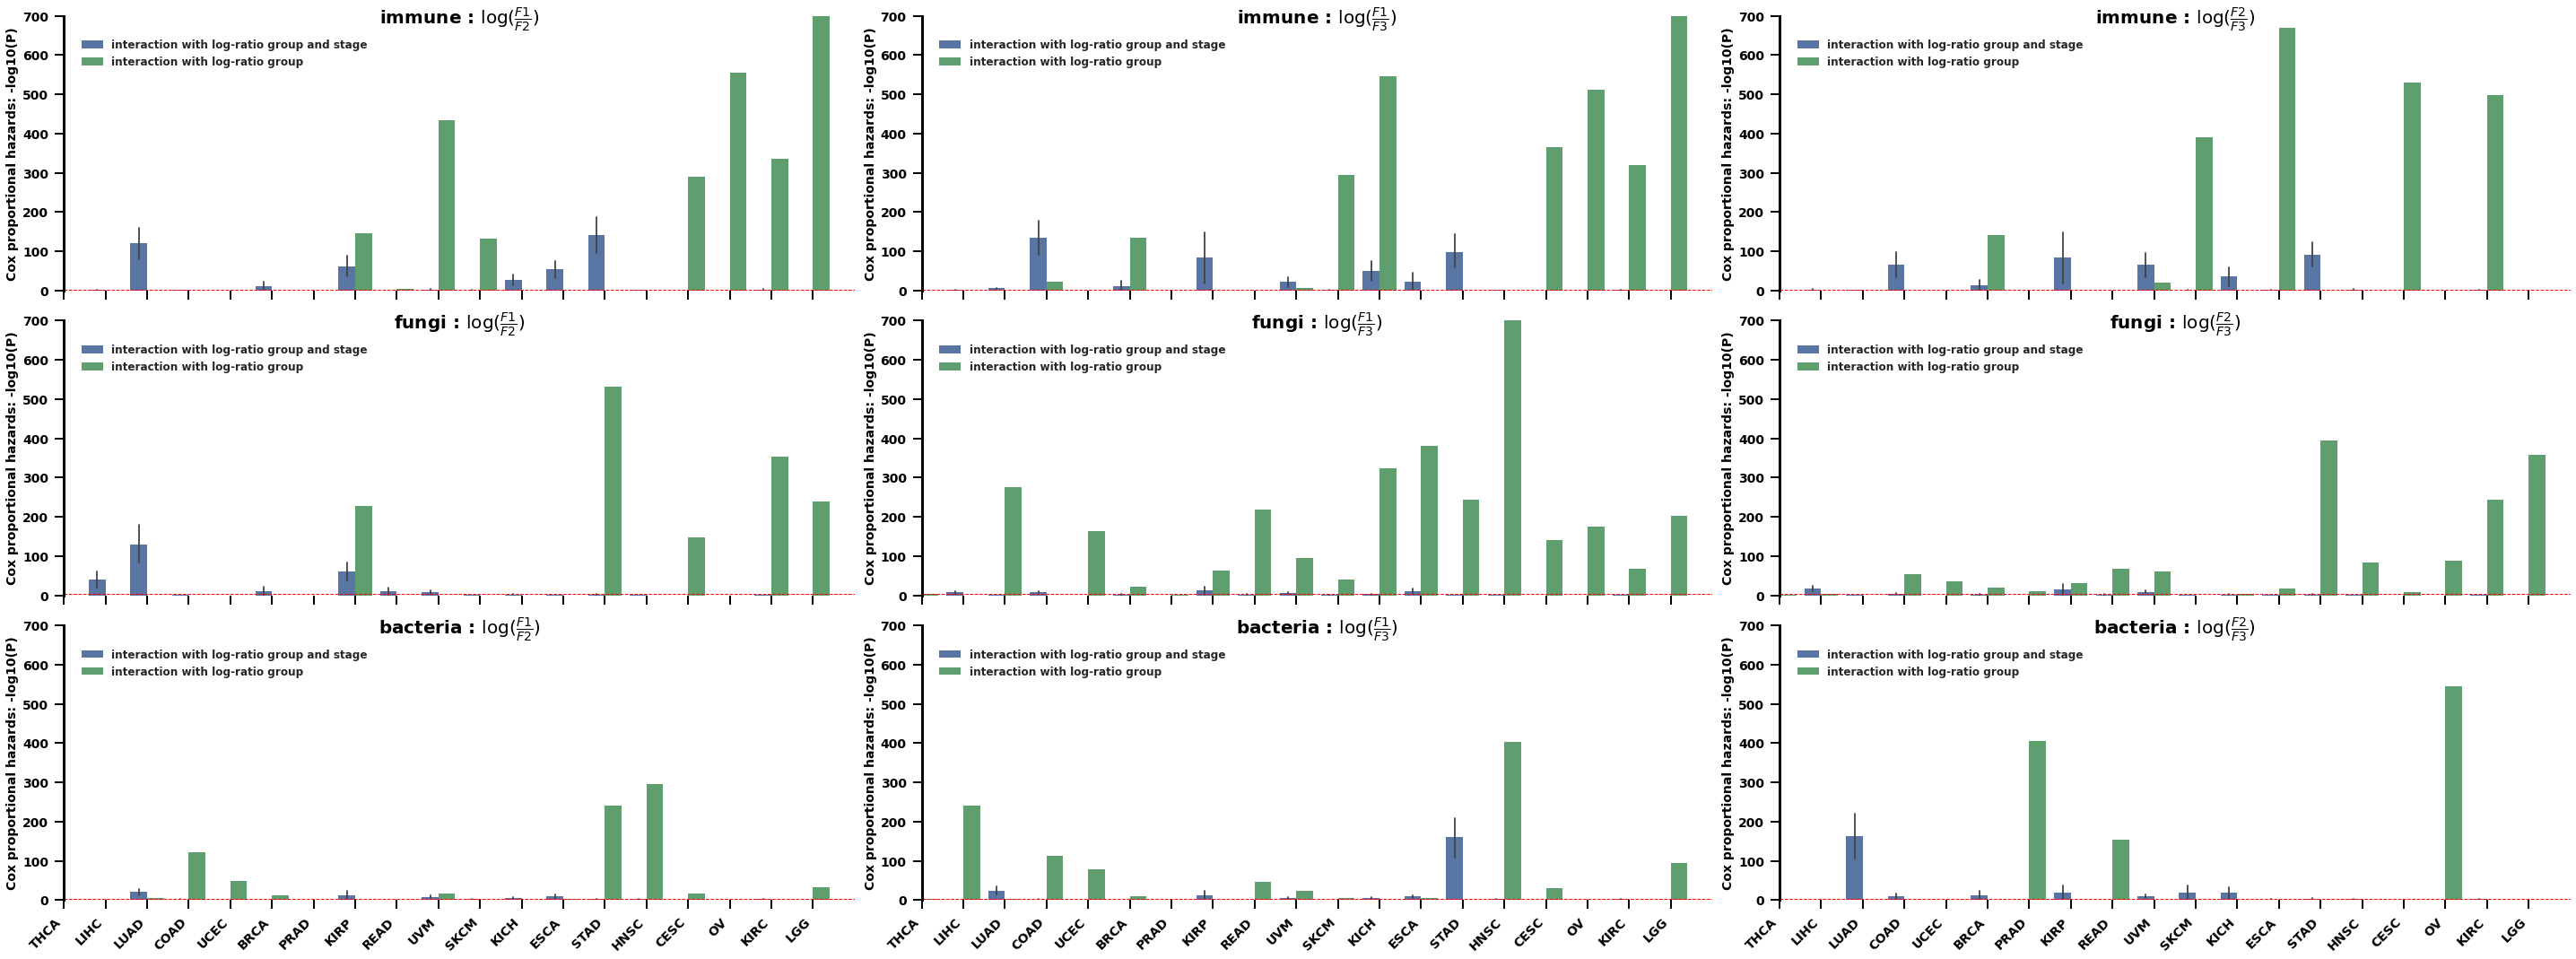

In [25]:
pal_tmp = {'C1':'#fc0808', 'C2':'#fffb05', 'C3':'#1efc00', 
           'C4':'#01ffff', 'C5':'#0037ff', 'C6':'#fd2afe'}
ratio_labels = {'flr_':{x + '_' + y:'fungi : $\\log(\\frac{%s}{%s})$' % (x, y) for x, y in  pairs_plot},
               'ilr_':{x + '_' + y:'immune : $\\log(\\frac{%s}{%s})$' % (x, y) for x, y in  pairs_plot},
                'blr_':{x + '_' + y:'bacteria : $\\log(\\frac{%s}{%s})$' % (x, y) for x, y in  pairs_plot}}

all_cox_per_cancer_df_stack = all_cox_per_cancer_df.pivot_table(columns = 'term', index = 'ratio', values='p.value').T
all_cox_per_cancer_df_stack = all_cox_per_cancer_df_stack * all_cox_per_cancer_df_stack.shape[1]
all_cox_per_cancer_df_stack[all_cox_per_cancer_df_stack > 1] = 1
all_cox_per_cancer_df_stack[all_cox_per_cancer_df_stack == 0] = 1
all_cox_per_cancer_df_stack_log = np.log(all_cox_per_cancer_df_stack) * -1

all_cox_per_cancer_df_stack_log_cancer_type = all_cox_per_cancer_df_stack_log.loc[[x for x in  all_cox_per_cancer_df_stack_log.index if 'log_ratio_class' in x and ('pathologic_stage_label' in x or 'TCGAStudy' in x)], :]
all_cox_per_cancer_df_stack_log_cancer_type = all_cox_per_cancer_df_stack_log_cancer_type.stack().reset_index()
all_cox_per_cancer_df_stack_log_cancer_type['cancer_type'] = [x.split('TCGAStudy')[1].split(':')[0] for x in all_cox_per_cancer_df_stack_log_cancer_type['term']]
all_cox_per_cancer_df_stack_log_cancer_type['groups'] = ['interaction with log-ratio group and stage' if 'pathologic_stage_label' in x else 'interaction with log-ratio group' for x in all_cox_per_cancer_df_stack_log_cancer_type.term]

order_x = all_cox_per_cancer_df_stack_log_cancer_type[all_cox_per_cancer_df_stack_log_cancer_type.groups == 'interaction with log-ratio group'].groupby('cancer_type').mean().sort_values(0).index

fig, axn = plt.subplots(3, 3, figsize=(40, 15), sharey=False, sharex=True)

ax_i = 0
axn = axn.flatten()

for lr_prefix in ['ilr_', 'flr_', 'blr_']:
    
    for lr_suffix in [x + '_' + y for x, y in pairs_plot]:
        
        
        lr_col_use = lr_prefix + lr_suffix
        
        ax = axn[ax_i]

        all_cox_per_cancer_df_stack = all_cox_per_cancer_df[all_cox_per_cancer_df.ratio == lr_col_use].pivot_table(columns = 'term', index = 'ratio', values='p.value').T
        all_cox_per_cancer_df_stack = all_cox_per_cancer_df_stack * all_cox_per_cancer_df_stack.shape[1]
        all_cox_per_cancer_df_stack[all_cox_per_cancer_df_stack > 1] = 1
        all_cox_per_cancer_df_stack[all_cox_per_cancer_df_stack == 0] = 1
        all_cox_per_cancer_df_stack_log = np.log(all_cox_per_cancer_df_stack) * -1

        all_cox_per_cancer_df_stack_log_cancer_type = all_cox_per_cancer_df_stack_log.loc[[x for x in  all_cox_per_cancer_df_stack_log.index if 'log_ratio_class' in x and ('pathologic_stage_label' in x or 'TCGAStudy' in x)], :]
        all_cox_per_cancer_df_stack_log_cancer_type = all_cox_per_cancer_df_stack_log_cancer_type.stack().reset_index()
        all_cox_per_cancer_df_stack_log_cancer_type['cancer_type'] = [x.split('TCGAStudy')[1].split(':')[0] for x in all_cox_per_cancer_df_stack_log_cancer_type['term']]
        all_cox_per_cancer_df_stack_log_cancer_type['groups'] = ['interaction with log-ratio group and stage' if 'pathologic_stage_label' in x else 'interaction with log-ratio group' for x in all_cox_per_cancer_df_stack_log_cancer_type.term]
 
        sns.barplot(x='cancer_type', y=0, hue='groups', data=all_cox_per_cancer_df_stack_log_cancer_type, ax=ax, ci=68,
                    order = order_x)

        ax.grid(False)
        ax.set_facecolor('white')
        ax.set_axisbelow(True)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        for sp_i in ax.spines.values():
            sp_i.set_linewidth(3)
        for child in ax.get_children():
            if isinstance(child, matplotlib.spines.Spine):
                child.set_color('black')
        ax.tick_params(axis='y', colors='black', width=2, length=10)
        ax.tick_params(axis='x', colors='black', width=2, length=10)

        for tick in ax.get_xticklabels():
            tick.set_fontproperties('arial')
            tick.set_ha('right')
            tick.set_rotation(45)
            tick.set_weight("bold")
            tick.set_color("black")
            tick.set_fontsize(14)

        for tick in ax.get_yticklabels():
            tick.set_fontproperties('arial')
            tick.set_weight("bold")
            tick.set_color("black")
            tick.set_fontsize(14)

        ax.set_xlabel('',
                          fontsize=14,
                          family = 'arial',
                          weight='normal',
                          color='black')

        ax.set_ylabel('Cox proportional hazards: -log10(P)',
                          fontsize=14,
                          family = 'arial',
                          weight='bold',
                          color='black')

        ax.axhline(np.log(0.05) * - 1, xmin=0, xmax=18.5, lw=1, ls='--', color='red')

        ax.set_ylim(0, 700)
        ax.set_xlim(0, 19)


        legend = ax.legend(loc=2, 
                          bbox_to_anchor=(0.01, 0.95),
                          prop={'size':12, 'weight':'bold'},
                          fancybox=True, framealpha=0.5, 
                          ncol=1, markerscale=2,
                          facecolor="white")
        for line in legend.get_lines()[:]:
            line.set_linewidth(8.0)
        for line in legend.get_lines()[:]:
            line.set_linewidth(4.0)
            
        ax.set_title(ratio_labels[lr_prefix][lr_suffix],
                     fontsize=20,
                     y=0.95,
                     weight='bold',
                     color='black')


        ax_i += 1

plt.tight_layout()

plt.savefig('../results/figures/log_ratio_survival_analysis/cox-interaction-sig.pdf',
                dpi=300, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')
plt.savefig('../results/figures/log_ratio_survival_analysis/cox-interaction-sig.svg',
                dpi=300, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')


plt.show()



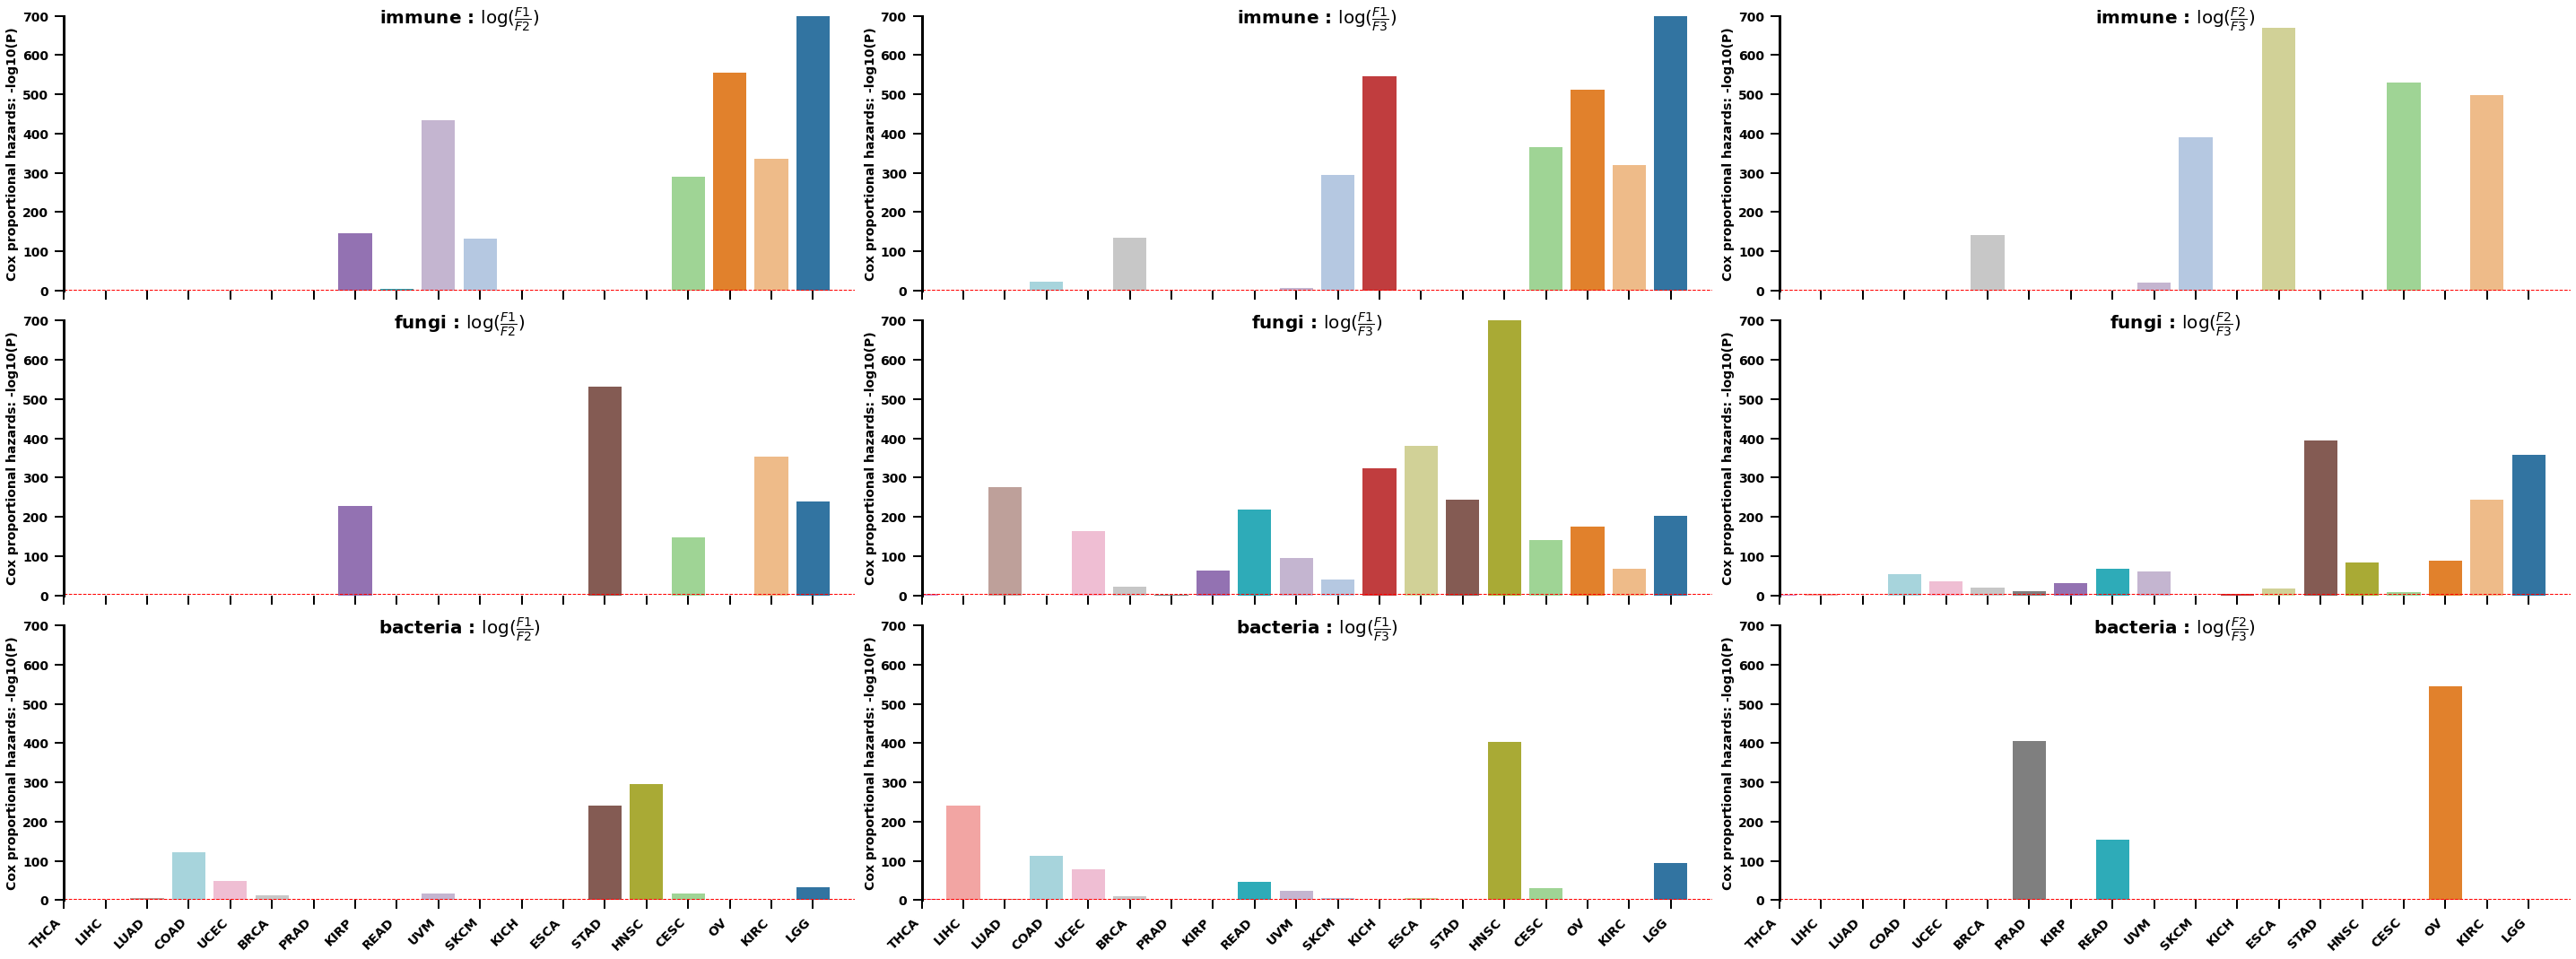

In [26]:
pal_tmp = {'C1':'#fc0808', 'C2':'#fffb05', 'C3':'#1efc00', 
           'C4':'#01ffff', 'C5':'#0037ff', 'C6':'#fd2afe'}
ratio_labels = {'flr_':{x + '_' + y:'fungi : $\\log(\\frac{%s}{%s})$' % (x, y) for x, y in  pairs_plot},
               'ilr_':{x + '_' + y:'immune : $\\log(\\frac{%s}{%s})$' % (x, y) for x, y in  pairs_plot},
                'blr_':{x + '_' + y:'bacteria : $\\log(\\frac{%s}{%s})$' % (x, y) for x, y in  pairs_plot}}

all_cox_per_cancer_df_stack = all_cox_per_cancer_df.pivot_table(columns = 'term', index = 'ratio', values='p.value').T
all_cox_per_cancer_df_stack = all_cox_per_cancer_df_stack * all_cox_per_cancer_df_stack.shape[1]
all_cox_per_cancer_df_stack[all_cox_per_cancer_df_stack > 1] = 1
all_cox_per_cancer_df_stack[all_cox_per_cancer_df_stack == 0] = 1
all_cox_per_cancer_df_stack_log = np.log(all_cox_per_cancer_df_stack) * -1

all_cox_per_cancer_df_stack_log_cancer_type = all_cox_per_cancer_df_stack_log.loc[[x for x in  all_cox_per_cancer_df_stack_log.index if 'log_ratio_class' in x and ('pathologic_stage_label' in x or 'TCGAStudy' in x)], :]
all_cox_per_cancer_df_stack_log_cancer_type = all_cox_per_cancer_df_stack_log_cancer_type.stack().reset_index()
all_cox_per_cancer_df_stack_log_cancer_type['cancer_type'] = [x.split('TCGAStudy')[1].split(':')[0] for x in all_cox_per_cancer_df_stack_log_cancer_type['term']]
all_cox_per_cancer_df_stack_log_cancer_type['groups'] = ['interaction with log-ratio group and stage' if 'pathologic_stage_label' in x else 'interaction with log-ratio group' for x in all_cox_per_cancer_df_stack_log_cancer_type.term]

order_x = all_cox_per_cancer_df_stack_log_cancer_type[all_cox_per_cancer_df_stack_log_cancer_type.groups == 'interaction with log-ratio group'].groupby('cancer_type').mean().sort_values(0).index

fig, axn = plt.subplots(3, 3, figsize=(40, 15), sharey=False, sharex=True)

ax_i = 0
axn = axn.flatten()

for lr_prefix in ['ilr_', 'flr_', 'blr_']:
    
    for lr_suffix in [x + '_' + y for x, y in pairs_plot]:
        
        
        lr_col_use = lr_prefix + lr_suffix
        
        ax = axn[ax_i]

        all_cox_per_cancer_df_stack = all_cox_per_cancer_df[all_cox_per_cancer_df.ratio == lr_col_use].pivot_table(columns = 'term', index = 'ratio', values='p.value').T
        all_cox_per_cancer_df_stack = all_cox_per_cancer_df_stack * all_cox_per_cancer_df_stack.shape[1]
        all_cox_per_cancer_df_stack[all_cox_per_cancer_df_stack > 1] = 1
        all_cox_per_cancer_df_stack[all_cox_per_cancer_df_stack == 0] = 1
        all_cox_per_cancer_df_stack_log = np.log(all_cox_per_cancer_df_stack) * -1

        all_cox_per_cancer_df_stack_log_cancer_type = all_cox_per_cancer_df_stack_log.loc[[x for x in  all_cox_per_cancer_df_stack_log.index if 'log_ratio_class' in x and ('pathologic_stage_label' in x or 'TCGAStudy' in x)], :]
        all_cox_per_cancer_df_stack_log_cancer_type = all_cox_per_cancer_df_stack_log_cancer_type.stack().reset_index()
        all_cox_per_cancer_df_stack_log_cancer_type['cancer_type'] = [x.split('TCGAStudy')[1].split(':')[0] for x in all_cox_per_cancer_df_stack_log_cancer_type['term']]
        all_cox_per_cancer_df_stack_log_cancer_type['groups'] = ['interaction with log-ratio group and stage' if 'pathologic_stage_label' in x else 'interaction with log-ratio group' for x in all_cox_per_cancer_df_stack_log_cancer_type.term]
        all_cox_per_cancer_df_stack_log_cancer_type = all_cox_per_cancer_df_stack_log_cancer_type[all_cox_per_cancer_df_stack_log_cancer_type.groups != 'interaction with log-ratio group and stage']
        sns.barplot(x='cancer_type', y=0,
                    data=all_cox_per_cancer_df_stack_log_cancer_type,
                    ax=ax, ci=68, palette=ctype_pal,
                    order = order_x)

        ax.grid(False)
        ax.set_facecolor('white')
        ax.set_axisbelow(True)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        for sp_i in ax.spines.values():
            sp_i.set_linewidth(3)
        for child in ax.get_children():
            if isinstance(child, matplotlib.spines.Spine):
                child.set_color('black')
        ax.tick_params(axis='y', colors='black', width=2, length=10)
        ax.tick_params(axis='x', colors='black', width=2, length=10)

        for tick in ax.get_xticklabels():
            tick.set_fontproperties('arial')
            tick.set_ha('right')
            tick.set_rotation(45)
            tick.set_weight("bold")
            tick.set_color("black")
            tick.set_fontsize(14)

        for tick in ax.get_yticklabels():
            tick.set_fontproperties('arial')
            tick.set_weight("bold")
            tick.set_color("black")
            tick.set_fontsize(14)

        ax.set_xlabel('',
                          fontsize=14,
                          family = 'arial',
                          weight='normal',
                          color='black')

        ax.set_ylabel('Cox proportional hazards: -log10(P)',
                          fontsize=14,
                          family = 'arial',
                          weight='bold',
                          color='black')

        ax.axhline(np.log(0.05) * - 1, xmin=0, xmax=18.5, lw=1, ls='--', color='red')

        ax.set_ylim(0, 700)
        ax.set_xlim(0, 19)
            
        ax.set_title(ratio_labels[lr_prefix][lr_suffix],
                     fontsize=20,
                     y=0.95,
                     weight='bold',
                     color='black')


        ax_i += 1

plt.tight_layout()

plt.savefig('../results/figures/log_ratio_survival_analysis/cox-interaction-sig-no-stage.pdf',
                dpi=300, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')
plt.savefig('../results/figures/log_ratio_survival_analysis/cox-interaction-sig-no-stage.svg',
                dpi=300, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')


plt.show()


In [27]:


all_cox = {path_.split('/')[-1].split('-')[0]:pd.read_csv(path_)
           for path_ in glob.glob('../results/tables/log_ratio_survival_analysis/*lr*all*os-cox.csv')}
all_os = {path_.split('/')[-1].split('-')[0]:pd.read_csv(path_)
           for path_ in glob.glob('../results/tables/log_ratio_survival_analysis/*lr*all*os-plot*')}

all_cox_df = pd.concat(all_cox)
all_os_df = pd.concat(all_os)

all_cox_df['p.value'] = all_cox_df['p.value'] * len(lrs_use)
all_cox_df.loc[all_cox_df['p.value'] > 1, 'p.value'] = 1
all_cox_df_sig = all_cox_df[all_cox_df['p.value'] < 0.05]

all_cox_df.to_csv('../results/tables/log_ratio_survival_analysis/cox-survival-os.csv')
all_os_df.to_csv('../results/tables/log_ratio_survival_analysis/survival-os.csv')

all_cox_df_sig.head(5)


Unnamed: 0                  term  estimate  std.error  statistic  \
flr_F1_F2 0           1  log_ratio_classlower  0.347343   0.107871   3.219976   
ilr_F1_F3 0           1  log_ratio_classlower  0.391487   0.105816   3.699698   
ilr_F2_F3 0           1  log_ratio_classlower  0.373164   0.105873   3.524640   

              p.value  conf.low  conf.high  
flr_F1_F2 0  0.011538  0.135919   0.558766  
ilr_F1_F3 0  0.001943  0.184092   0.598882  
ilr_F2_F3 0  0.003817  0.165657   0.580672

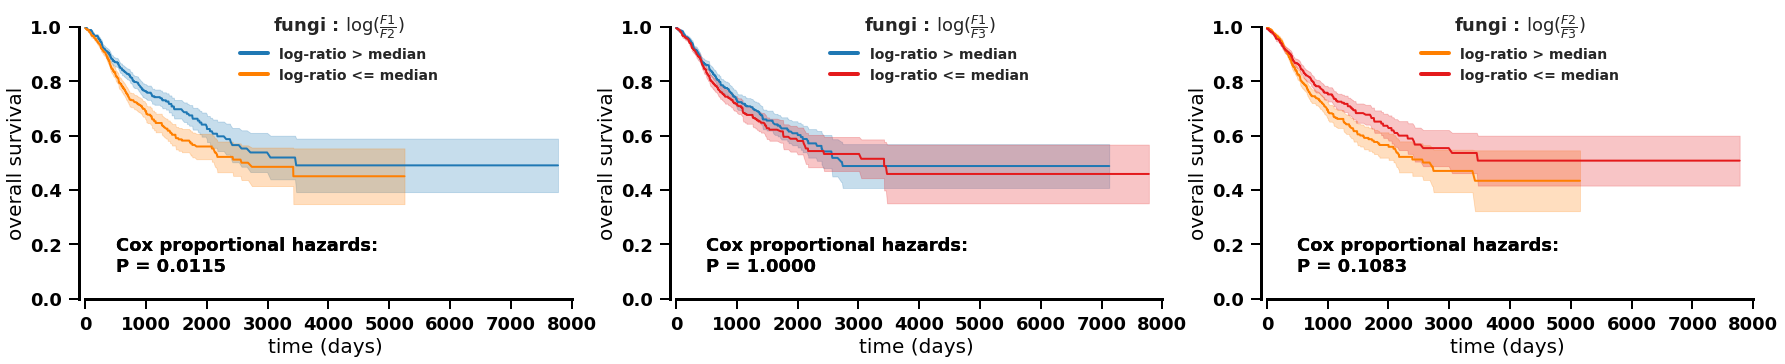

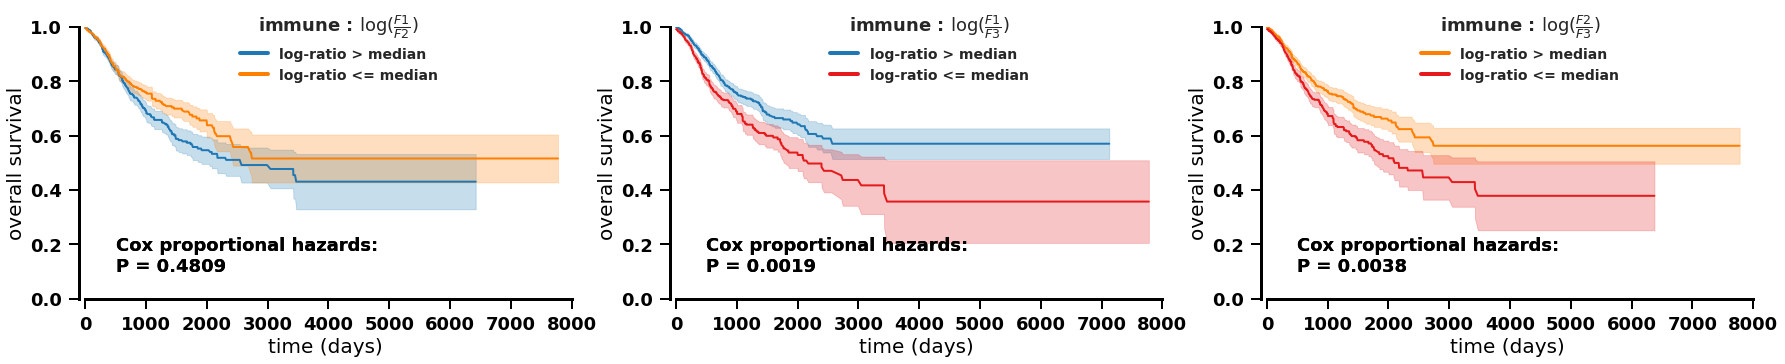

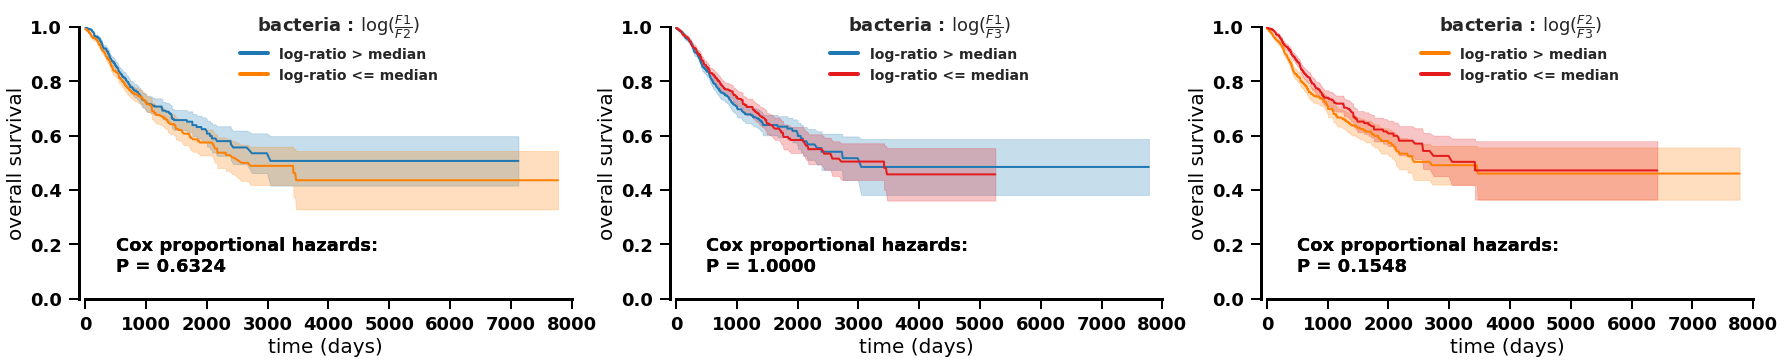

In [28]:

#pal_tmp_cooccrrance_clusters = {'F1':'#1f78b4', 'F2':'#e31a1c', 'F3':'##ff7f00', 'F1F2':'##ff7f00'}
#pal_tmp_cooccrrance_clusters = {'F1':'#1f78b4', 'F2':'#ff7f00', 'F3':'##ff7f00'}

preficx_label = {'f':'fungi', 'i':'immune', 'b':'bacteria'}

for prefix_ in ['f', 'i', 'b']:

    fig, axn = plt.subplots(1, 3, figsize=(30, 5), sharey=False)

    for i_ax, (log_use_tmp, ax) in enumerate(zip(['lr_F1_F2','lr_F1_F3','lr_F2_F3'], axn)):

        log_use_tmp = prefix_ + log_use_tmp
        tmp_suv_plot = all_os[log_use_tmp].copy()

        high_plot = tmp_suv_plot[tmp_suv_plot.strata == 'log_ratio_class=higher']
        low_plot = tmp_suv_plot[tmp_suv_plot.strata == 'log_ratio_class=lower']

        for plt_tmp, color_, label_ in zip([high_plot, low_plot], 
                                           [log_use_tmp.split('_')[1],  log_use_tmp.split('_')[2]],
                                           ['log-ratio > median', 'log-ratio <= median']):

            surv_error_ = plt_tmp['std.error']
            surv_est_ = plt_tmp['estimate']
            time_ = plt_tmp['time']
            ax.plot(time_, surv_est_, 'k-', label=label_,
                     color=pal_tmp_cooccrrance_clusters[color_], lw=2)
            ax.fill_between(time_, surv_est_ - surv_error_, surv_est_ + surv_error_,
                             alpha=0.25, color=pal_tmp_cooccrrance_clusters[color_])

            ax.grid(False)
            ax.set_facecolor('white')
            ax.set_axisbelow(True)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(True)
            ax.spines['bottom'].set_visible(True)
            ax.spines['top'].set_visible(False)
            for sp_i in ax.spines.values():
                sp_i.set_linewidth(3)
            for child in ax.get_children():
                if isinstance(child, matplotlib.spines.Spine):
                    child.set_color('black')
            ax.tick_params(axis='y', colors='black', width=2, length=10)
            ax.tick_params(axis='x', colors='black', width=2, length=10)

            for tick in ax.get_xticklabels():
                tick.set_weight("bold")
                tick.set_color("black")
                tick.set_fontsize(18)

            for tick in ax.get_yticklabels():
                tick.set_weight("bold")
                tick.set_color("black")
                tick.set_fontsize(18)

            ax.spines['left'].set_bounds(0, 1)
            ax.set_ylim(0, 1)
            ax.spines['bottom'].set_bounds(0, 8000)
            ax.set_xlim(-100, 8000)


            if i_ax == 0:
                ax.set_ylabel('overall survival',
                          fontsize=25,
                          family = 'arial',
                          weight='normal',
                          color='black')
            else:
                ax.set_ylabel('',
                          fontsize=25,
                          family = 'arial',
                          weight='normal',
                          color='black')    
                
                
            ax.set_ylabel('overall survival',
                      fontsize=20,
                      family = 'arial',
                      weight='normal',
                      color='black')
                
            ax.set_xlabel('time (days)',
                      fontsize=20,
                      family = 'arial',
                      weight='normal',
                      color='black')

            legend = ax.legend(loc=2, 
                              bbox_to_anchor=(0.3, 1.1),
                              prop={'size':14, 'weight':'bold'},
                              fancybox=True, framealpha=0.5, 
                              ncol=1, markerscale=2,
                              facecolor="white")
            legend.set_title('%s : $\\log(\\frac{%s}{%s})$' % (preficx_label[prefix_],log_use_tmp.split('_')[1], 
                                                                   log_use_tmp.split('_')[2]),
                             prop={'size':18, 'weight':'bold'})
            for line in legend.get_lines()[:]:
                line.set_linewidth(8.0)
            for line in legend.get_lines()[:]:
                line.set_linewidth(4.0)

            stat_, p_ = all_cox_df.loc[(log_use_tmp, 0), ['statistic','p.value']]
            stat_txt = 'Cox proportional hazards:\nP = %.4f' % (p_)
            ax.annotate(stat_txt, (500, 0.1), fontsize=18, color='black', weight='bold')

    plt.savefig('../results/figures/log_ratio_survival_analysis/%s-log-ratio-survival-analysis.pdf' % (log_use_tmp.split('_')[0]),
                dpi=300, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')
    plt.savefig('../results/figures/log_ratio_survival_analysis/%s-log-ratio-survival-analysis.svg' % (log_use_tmp.split('_')[0]),
                dpi=300, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')

    plt.show()
